In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - partner_i oficial data

## Reading the dataset

In [3]:
xls = pd.ExcelFile(
    "../../../data/raw/partner_i-Oficial/DB_Master_CP1_latest v03.06.xlsx",
    engine="openpyxl",
)
df = pd.read_excel(xls, "DB3 Cimento Shipping", header=[1, 2])

<IPython.core.display.Javascript object>

In [4]:
df = pd.concat([df["Date"], df["Time"], df["Composition"], df["Properties"]], axis=1)
df = df.drop([0, 1, 2], axis=0).reset_index(drop=True)

df = pd.concat(
    [
        df["Production"].iloc[:, 0],
        df["Measurement"].iloc[:, 0],
        df["Production"].iloc[:, 1].rename("Production.1"),
        df["Measurement"].iloc[:, 1].rename("Measurement.1"),
        df.drop(["Production", "Measurement"], axis=1),
    ],
    axis=1,
)

df = df.infer_objects()

<IPython.core.display.Javascript object>

In [5]:
df = df[df["Remarks"] == "CPVARI Expedido"].reset_index(drop=True)
df = df.rename({"Production": "Date"}, axis=1)
df = df.drop(["Measurement", "Production.1", "Measurement.1"], axis=1)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

<IPython.core.display.Javascript object>

## EDA

In [6]:
df.shape

(234, 54)

<IPython.core.display.Javascript object>

In [7]:
df.head()

,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
0,2020-01-03,59.827351,3.71899,0.18423,4.25718,18.616140,4.42556,1.19938,NaN,2.76630,...,135.0,195.0,3.06,27.799999,35.900002,40.099998,43.900002,0.0,0.4,0.8
1,2020-01-07,59.606731,3.64745,0.20358,4.22977,18.271490,4.42312,1.20079,NaN,2.76412,...,135.0,195.0,3.06,27.100000,37.000000,40.200001,43.599998,0.0,0.3,0.6
2,2020-01-10,60.078941,3.71153,0.19565,4.31828,18.672331,4.30080,1.20930,NaN,2.79868,...,140.0,195.0,3.06,26.400000,35.900002,40.700001,44.000000,0.0,0.5,0.9
3,2020-01-15,60.407970,3.68356,0.20532,4.48047,19.379869,4.11357,1.23226,NaN,2.93348,...,135.0,195.0,3.06,27.799999,36.099998,40.799999,43.700001,0.0,0.5,1.0
4,2020-01-18,59.976940,3.40732,0.20977,4.35947,18.781260,3.62266,1.22097,NaN,2.86707,...,140.0,200.0,3.06,26.799999,36.500000,41.200001,44.000000,0.0,0.5,1.0


<IPython.core.display.Javascript object>

In [8]:
df.tail()

,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
229,2021-12-21,59.207539,3.28453,0.20650,4.16616,18.446280,3.80032,1.30026,NaN,3.12301,...,140.0,195.0,3.08,26.500000,36.599998,42.599998,46.599998,0.0,1.4,3.0
230,2022-01-03,59.406952,3.45190,0.20156,4.29065,18.673260,4.04944,1.28860,NaN,3.13035,...,140.0,210.0,3.09,27.000000,36.400002,41.299999,46.599998,0.1,1.1,2.4
231,2022-02-11,59.327518,3.46848,0.26874,4.25827,18.433941,5.05675,1.19572,NaN,3.16508,...,140.0,210.0,3.08,28.700001,38.000000,42.599998,48.099998,0.0,1.0,2.4
232,2022-02-21,59.931610,3.49631,0.24383,4.26948,18.782320,4.37159,1.19726,NaN,3.30265,...,145.0,205.0,3.08,28.500000,38.000000,42.599998,48.299999,0.1,1.1,2.1
233,2022-03-16,58.692280,3.56671,0.23815,4.23129,18.578831,4.12642,1.30014,NaN,3.10963,...,130.0,185.0,3.08,26.400000,38.200001,41.500000,NaN,0.1,0.8,1.6


<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         234 non-null    datetime64[ns]
 1   CaO                          227 non-null    float64       
 2   MgO                          227 non-null    float64       
 3   Na2O                         227 non-null    float64       
 4   Al2O3                        227 non-null    float64       
 5   SiO2                         227 non-null    float64       
 6   SO3                          227 non-null    float64       
 7   K2O                          227 non-null    float64       
 8   TiO2                         0 non-null      object        
 9   Fe2O3                        227 non-null    float64       
 10  Ca(OH)2                      0 non-null      object        
 11  CaCO3                        0 non-null      

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [10]:
df.dtypes.value_counts()

float64           49
object             4
datetime64[ns]     1
dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CaO,227.0,59.908283,0.893400,53.499580,59.528259,59.916248,60.422615,62.997490
MgO,227.0,3.106778,0.438282,2.086200,2.786080,3.111810,3.403565,4.520740
Na2O,227.0,0.206476,0.020667,0.056230,0.198850,0.204890,0.215040,0.268740
Al2O3,227.0,4.327067,0.134333,3.785610,4.260920,4.330120,4.410710,4.716160
SiO2,227.0,18.598004,0.579341,15.730160,18.364889,18.618160,18.938865,20.024290
SO3,227.0,3.963836,0.362724,2.797460,3.757490,3.979790,4.192220,5.056750
K2O,227.0,1.230931,0.072662,0.727630,1.208020,1.228750,1.247215,1.452580
Fe2O3,227.0,2.888369,0.148033,2.385400,2.800695,2.864250,2.967065,3.302650
Total alkali as Na2O,197.0,0.935902,0.081656,0.510080,0.901300,0.938920,0.990000,1.110000
Soundness,211.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [12]:
df.describe(exclude="number").T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Date,234,220,2020-02-03 00:00:00,2,2020-01-03,2022-05-03
TiO2,0,0,NaN,NaN,NaT,NaT
Ca(OH)2,0,0,NaN,NaN,NaT,NaT
CaCO3,0,0,NaN,NaN,NaT,NaT
Remarks,234,1,CPVARI Expedido,234,NaT,NaT


<IPython.core.display.Javascript object>

In [13]:
df["Remarks"].unique()

array(['CPVARI Expedido'], dtype=object)

<IPython.core.display.Javascript object>

In [14]:
print(df["Date"].min())
print(df["Date"].max())

2020-01-03 00:00:00
2022-05-03 00:00:00


<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

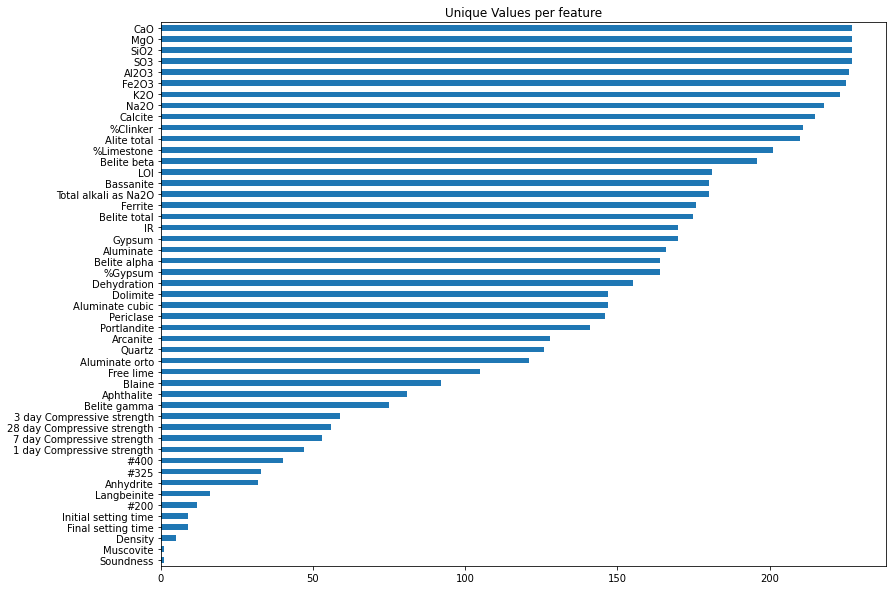

<IPython.core.display.Javascript object>

In [15]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TiO2'),
  Text(1, 0, 'Ca(OH)2'),
  Text(2, 0, 'CaCO3'),
  Text(3, 0, 'Remarks'),
  Text(4, 0, 'Date')])

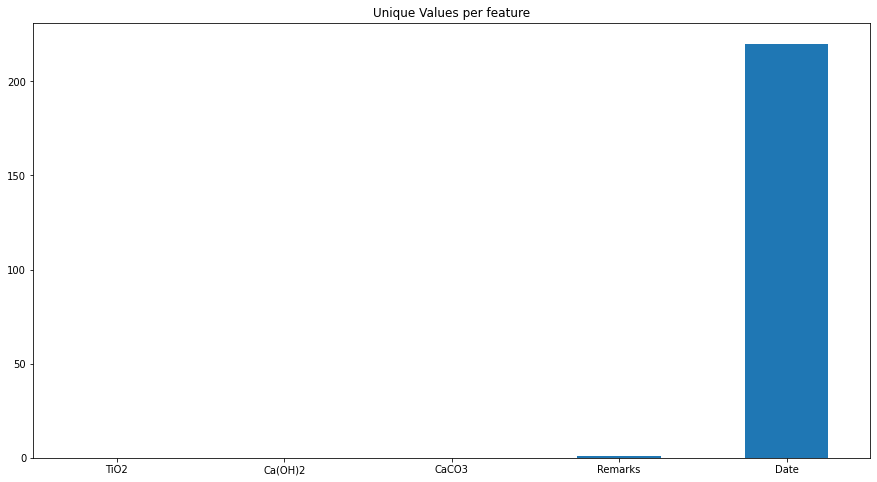

<IPython.core.display.Javascript object>

In [16]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [17]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 50 variables with missing values from a total of 54


<IPython.core.display.Javascript object>

In [18]:
df.isna().any()

Date                           False
CaO                             True
MgO                             True
Na2O                            True
Al2O3                           True
SiO2                            True
SO3                             True
K2O                             True
TiO2                            True
Fe2O3                           True
Ca(OH)2                         True
CaCO3                           True
Total alkali as Na2O            True
Soundness                       True
LOI                            False
IR                             False
Alite total                     True
Belite total                    True
Belite alpha                    True
Belite beta                     True
Belite gamma                    True
Ferrite                         True
Aluminate                       True
Aluminate cubic                 True
Aluminate orto                  True
Free lime                       True
Portlandite                     True
P

<IPython.core.display.Javascript object>

In [19]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
TiO2,234
CaCO3,234
Ca(OH)2,234
Langbeinite,163
Dehydration,79
Belite total,42
Total alkali as Na2O,37
Soundness,23
%Gypsum,11
%Clinker,11


<IPython.core.display.Javascript object>

In [20]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  1231 missing values.


<IPython.core.display.Javascript object>

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

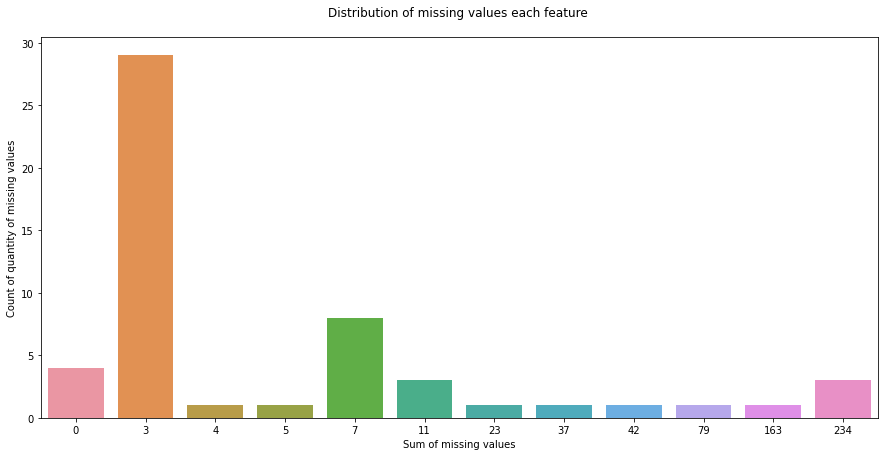

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 54 artists>

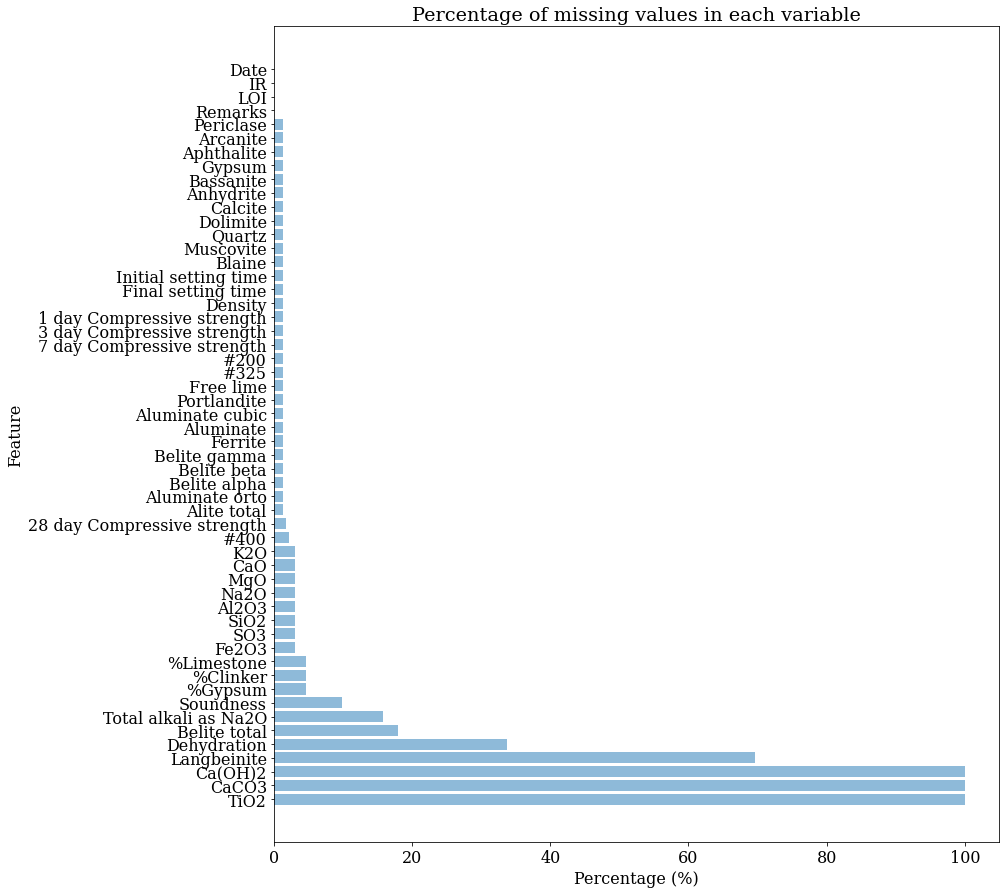

<IPython.core.display.Javascript object>

In [22]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [23]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
TiO2,100.000000
CaCO3,100.000000
Ca(OH)2,100.000000
Langbeinite,69.658120
Dehydration,33.760684
Belite total,17.948718
Total alkali as Na2O,15.811966
Soundness,9.829060
%Gypsum,4.700855
%Clinker,4.700855


<IPython.core.display.Javascript object>

In [24]:
df_copy = df.copy().select_dtypes(exclude=object)
df_copy["Remarks"] = df["Remarks"].values.copy()
df_grouped = df_copy.groupby(["Remarks", "Date"]).mean()

# If we just count the daily mean by cement type, how does the missing be afterwards

(df_grouped.isna().sum() / df_grouped.shape[0] * 100).sort_values(
    ascending=False
).to_frame(name="Missing (%)").style.background_gradient(cmap="Reds")

,Missing (%)
Langbeinite,70.454545
Dehydration,32.727273
Belite total,14.545455
Total alkali as Na2O,13.636364
Soundness,8.636364
%Limestone,3.636364
%Gypsum,3.636364
%Clinker,3.636364
CaO,1.818182
Fe2O3,1.818182


<IPython.core.display.Javascript object>

<BarContainer object of 54 artists>

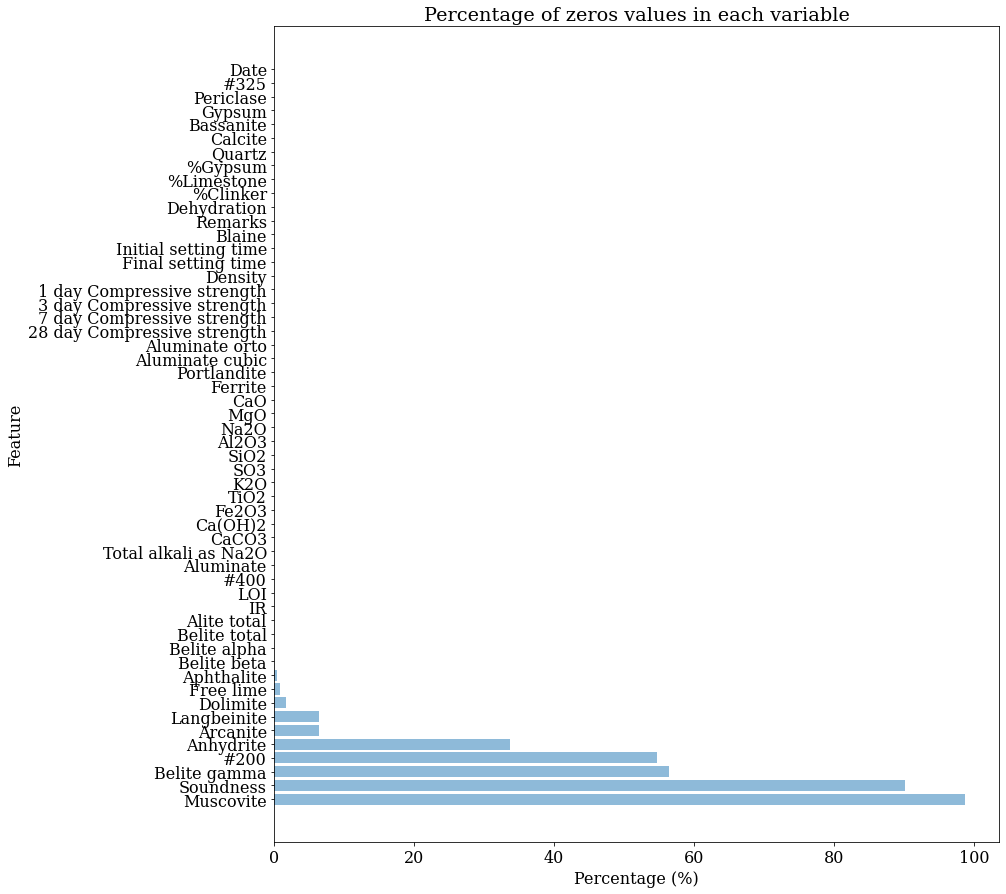

<IPython.core.display.Javascript object>

In [25]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [26]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [27]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

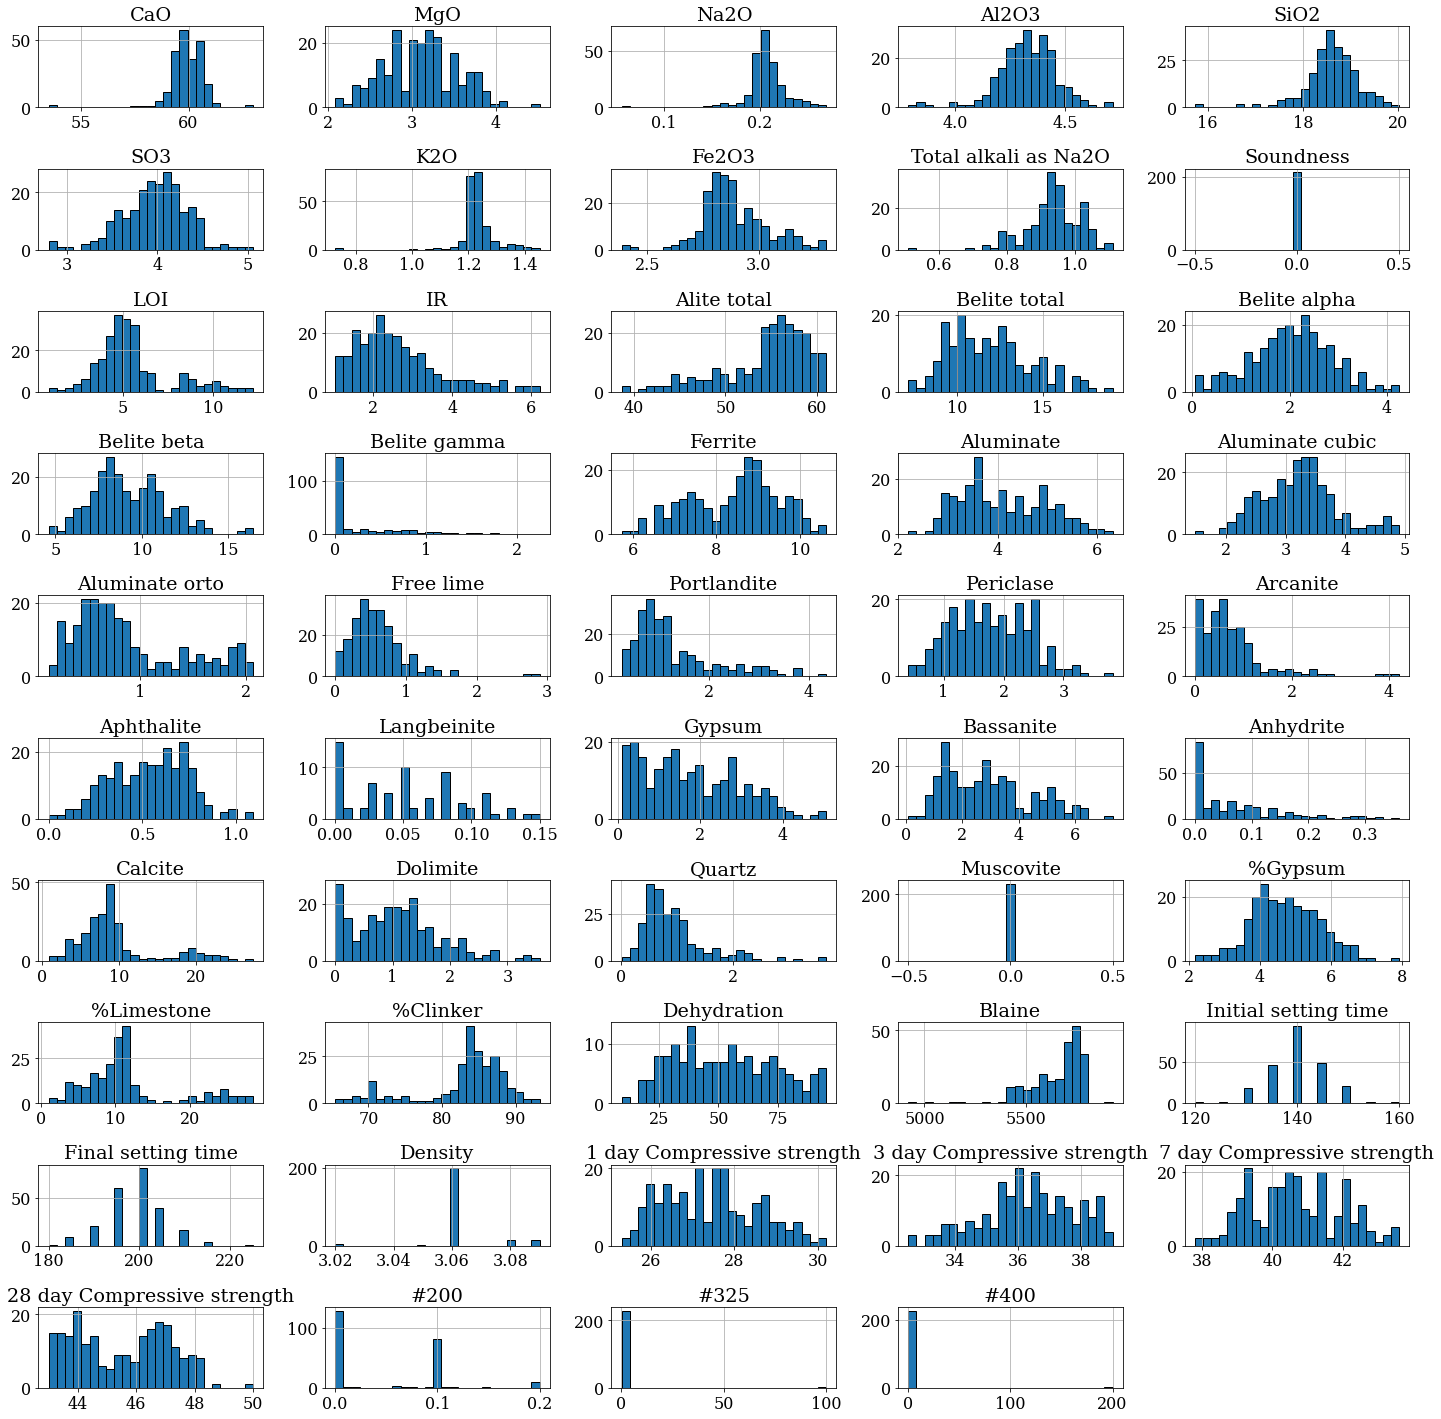

<IPython.core.display.Javascript object>

In [28]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

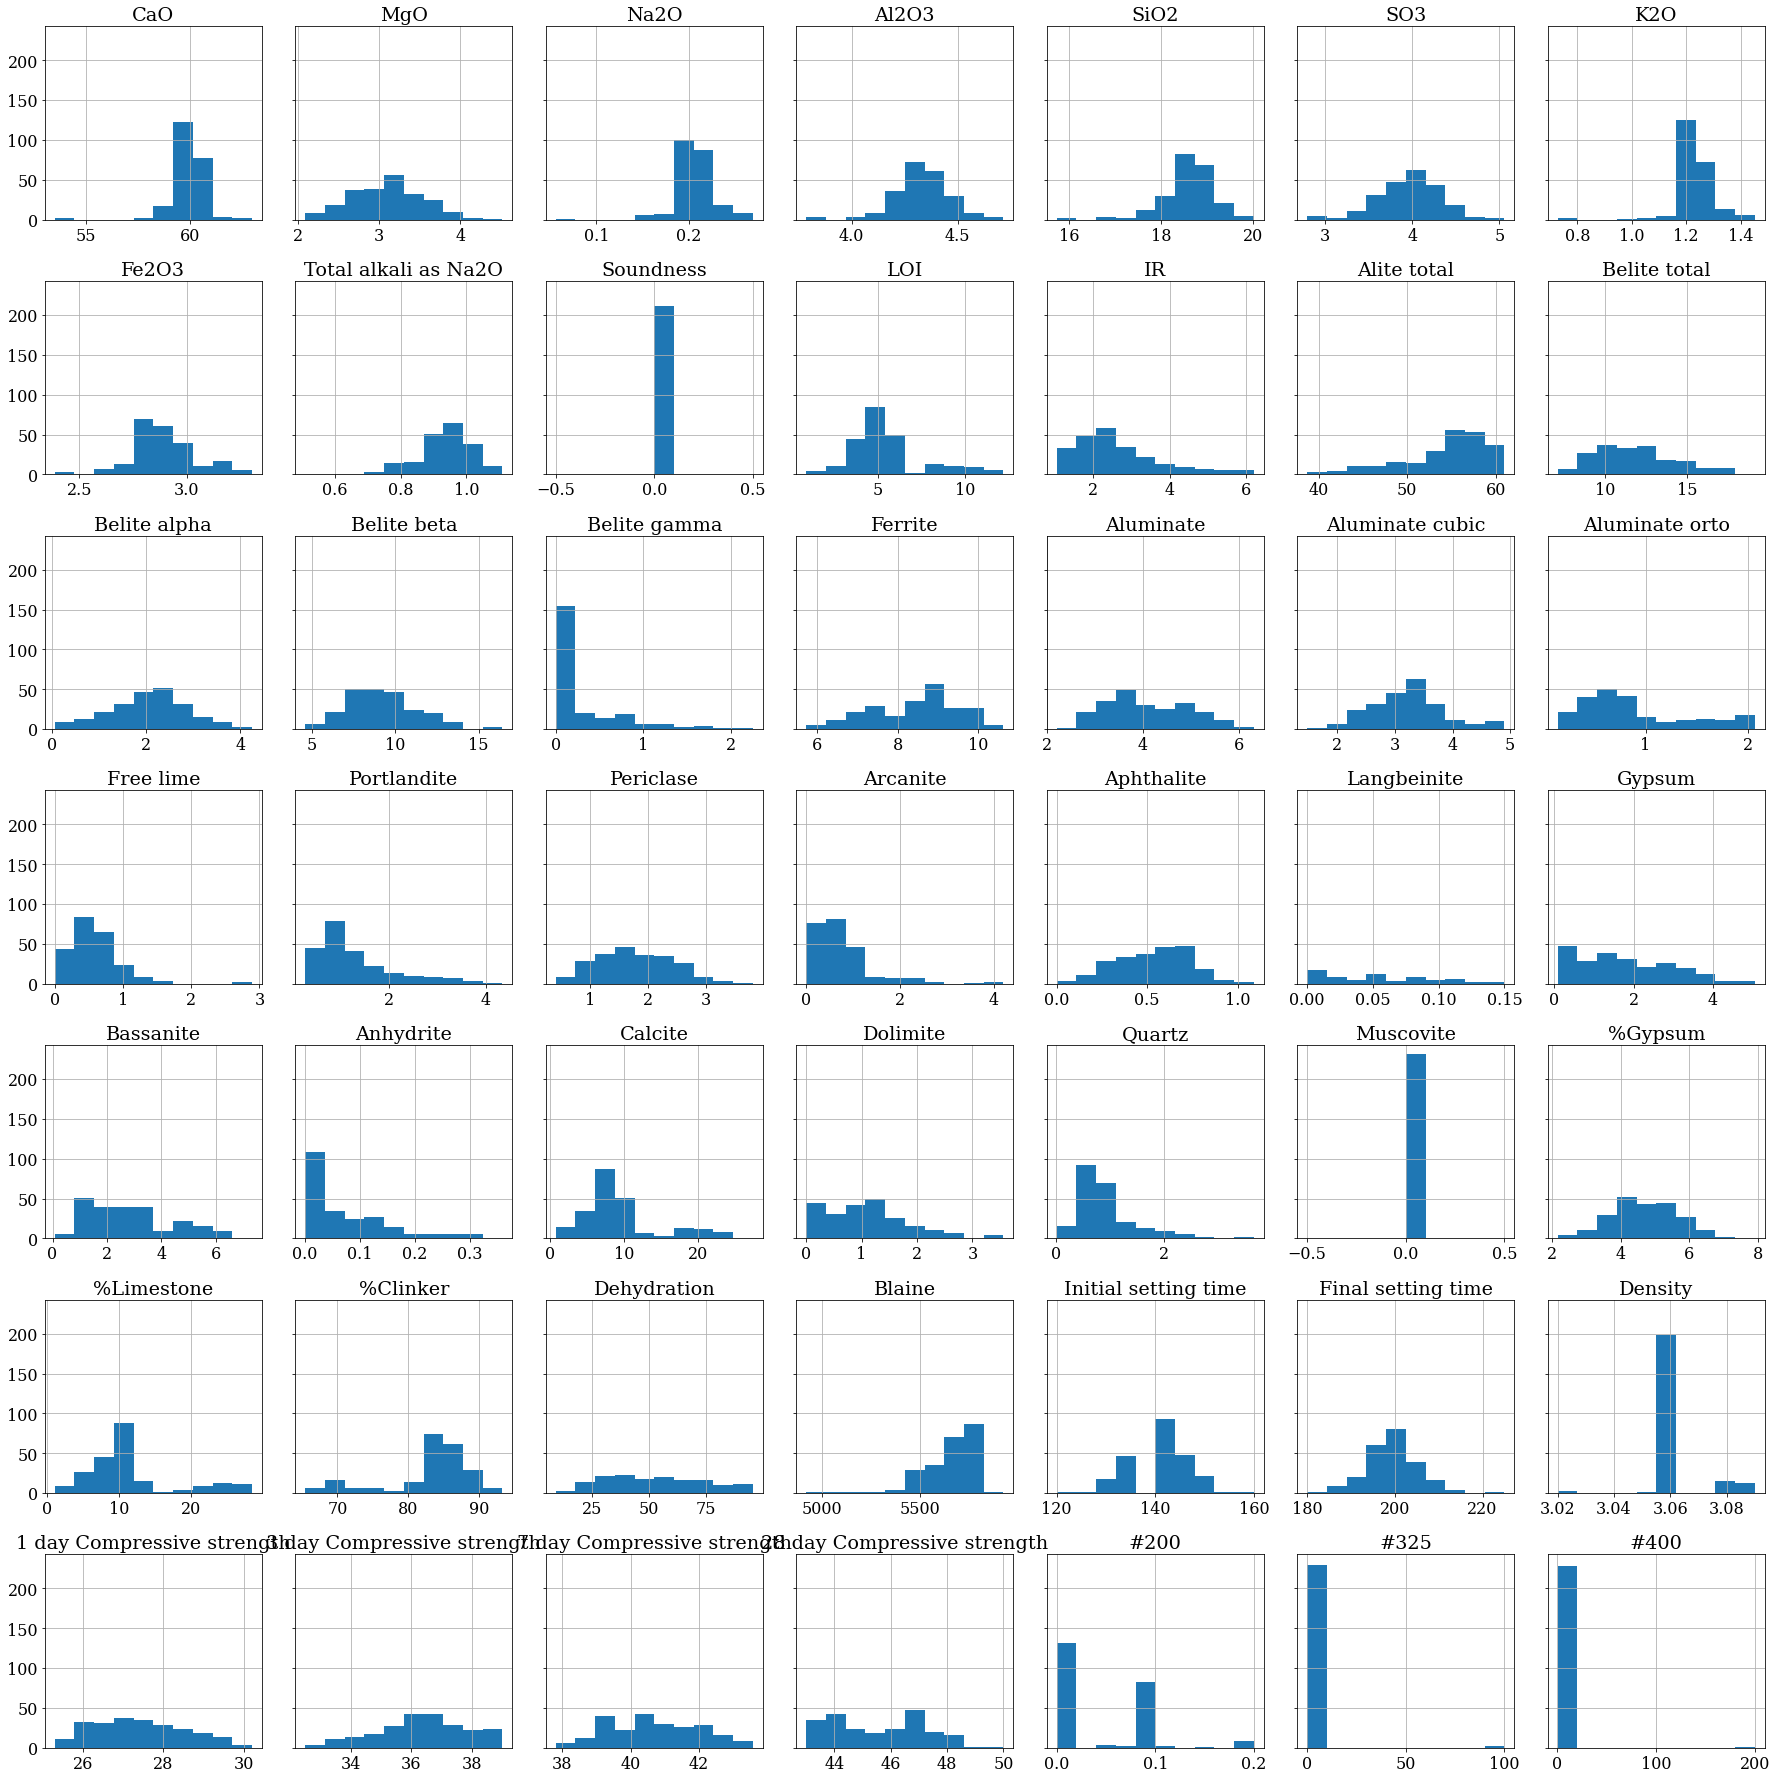

<IPython.core.display.Javascript object>

In [29]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


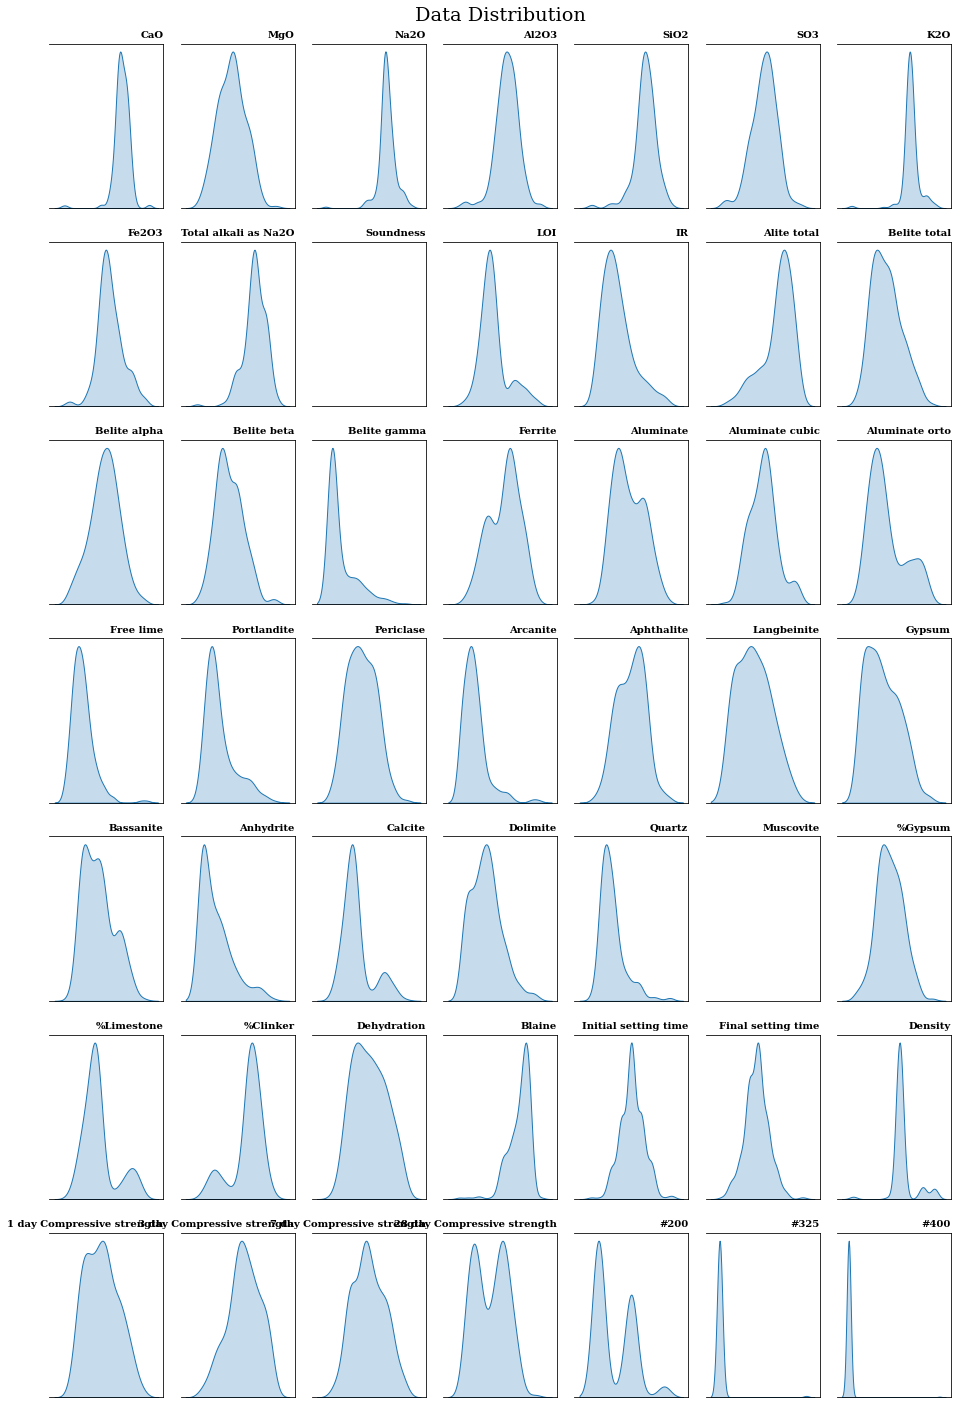

<IPython.core.display.Javascript object>

In [30]:
fig, axes = plt.subplots(7, 7, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

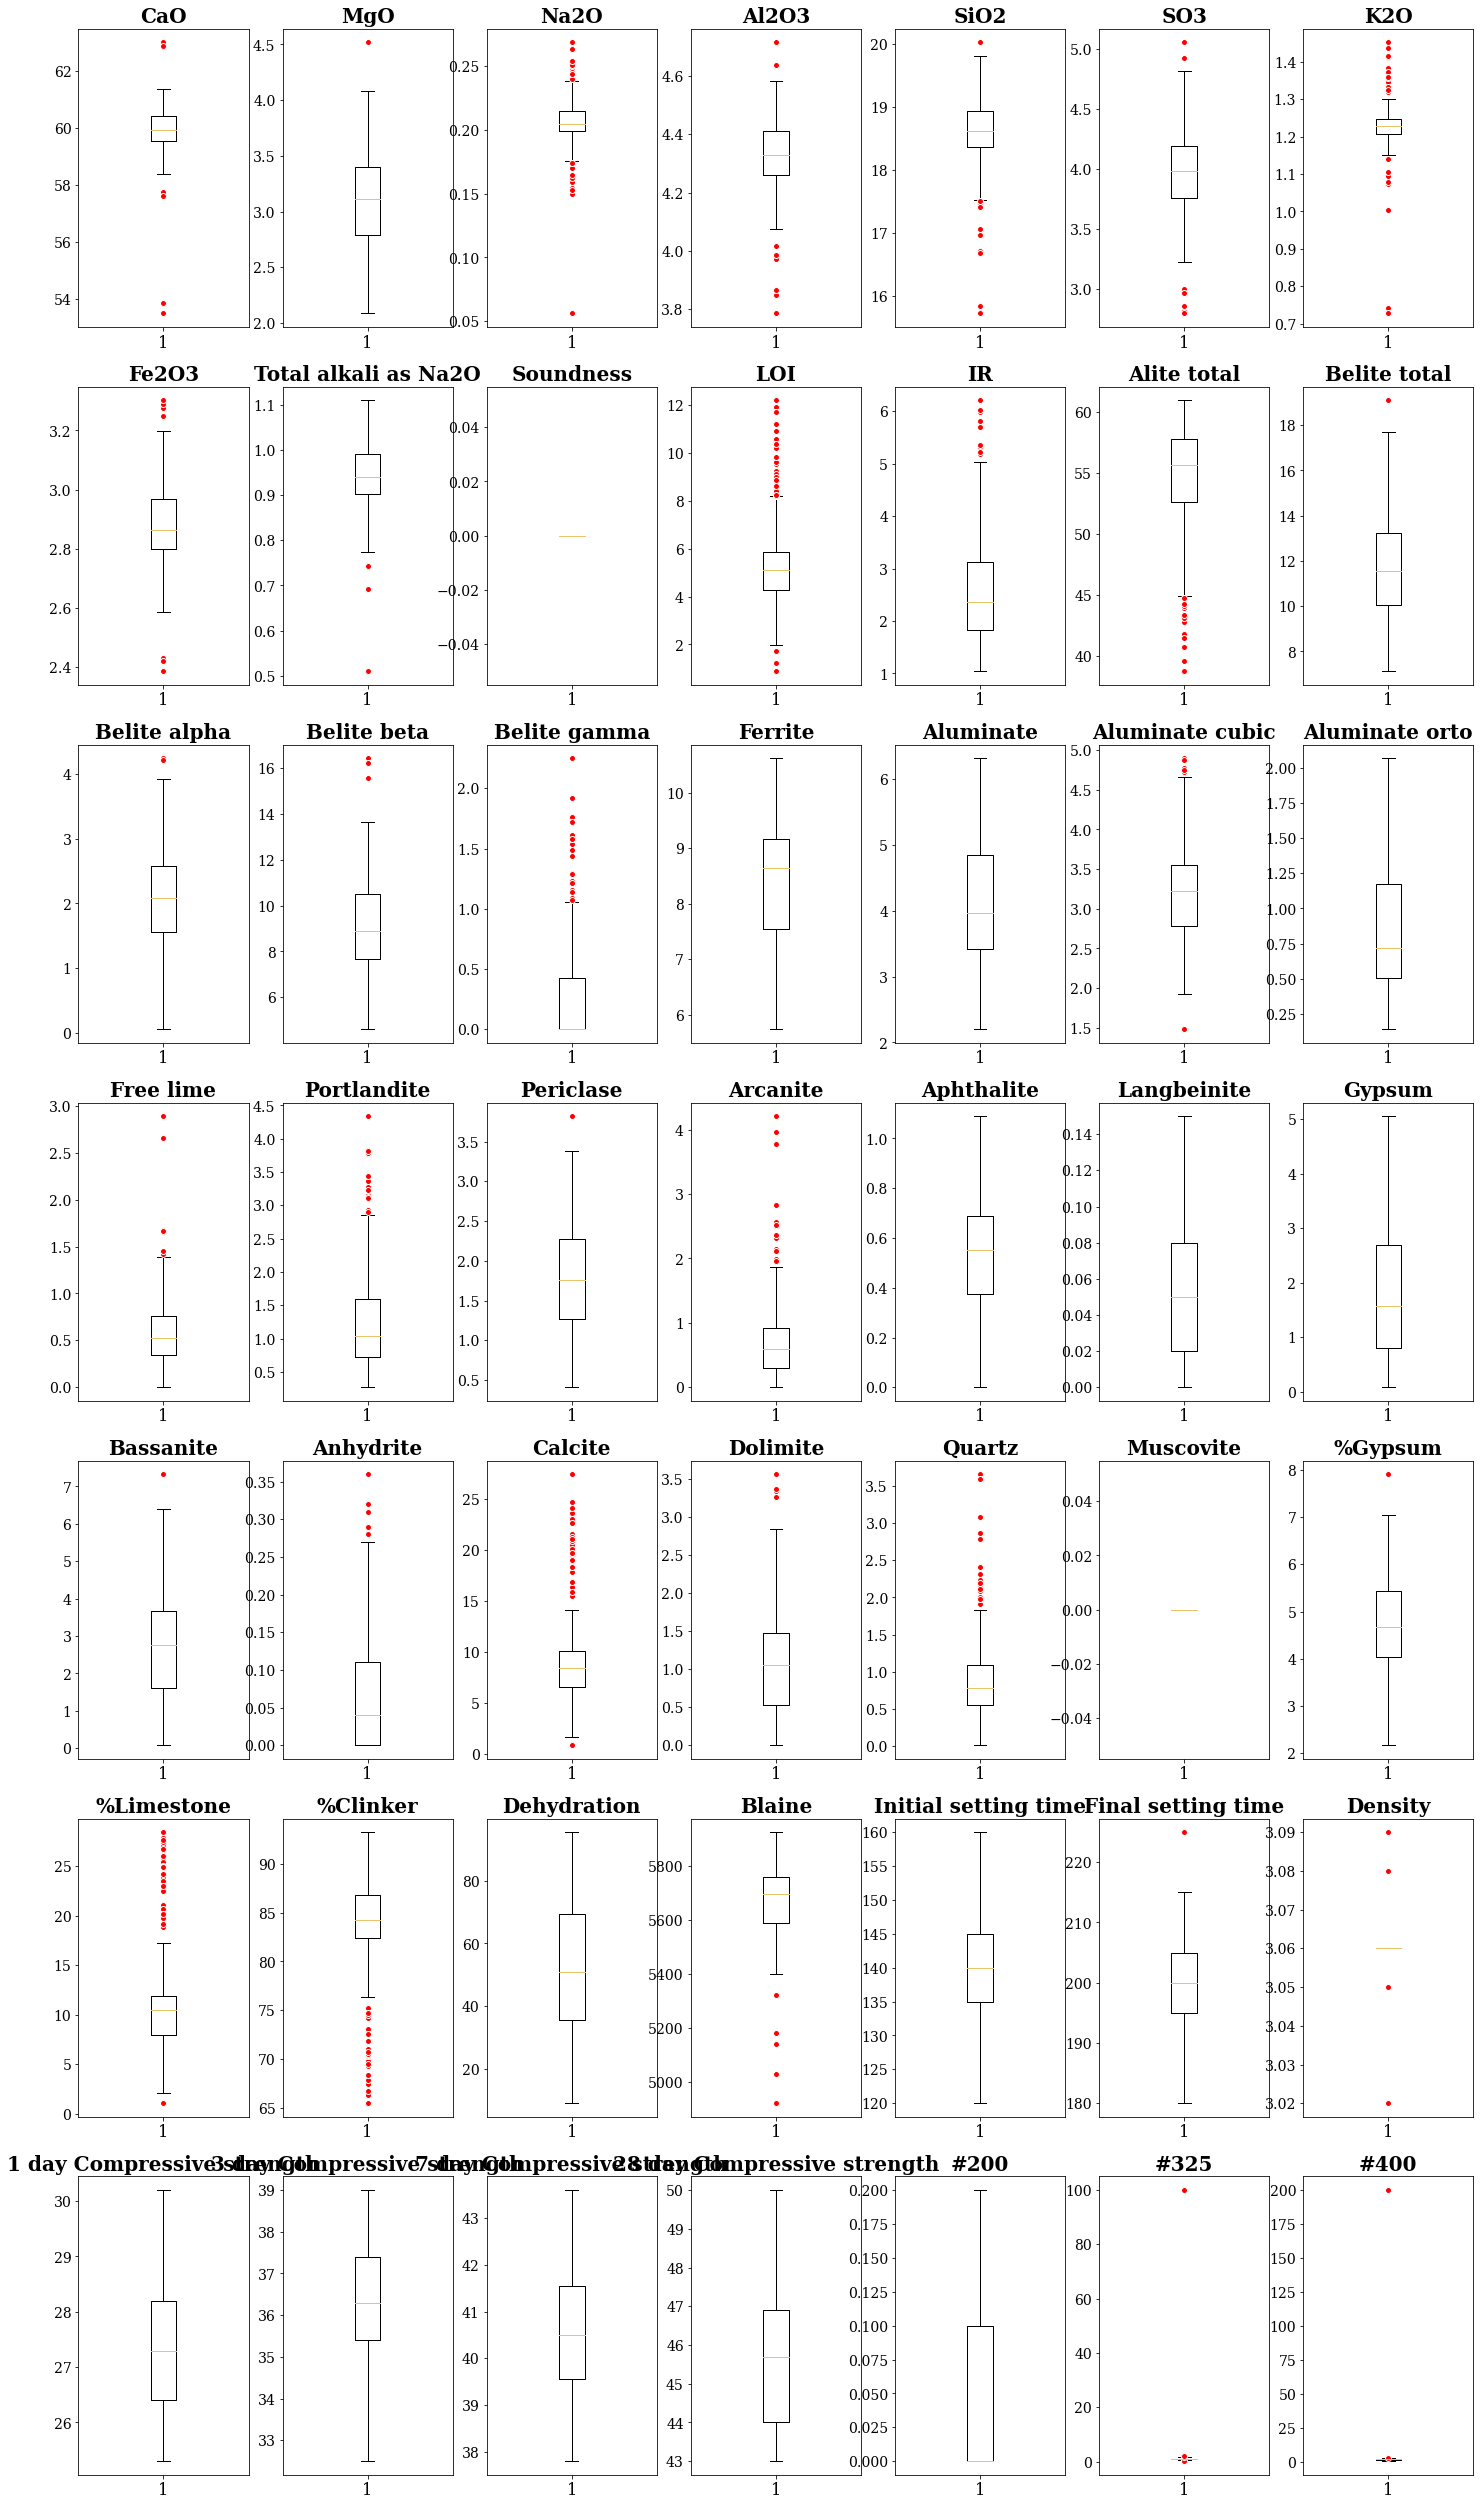

<IPython.core.display.Javascript object>

In [31]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(7, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

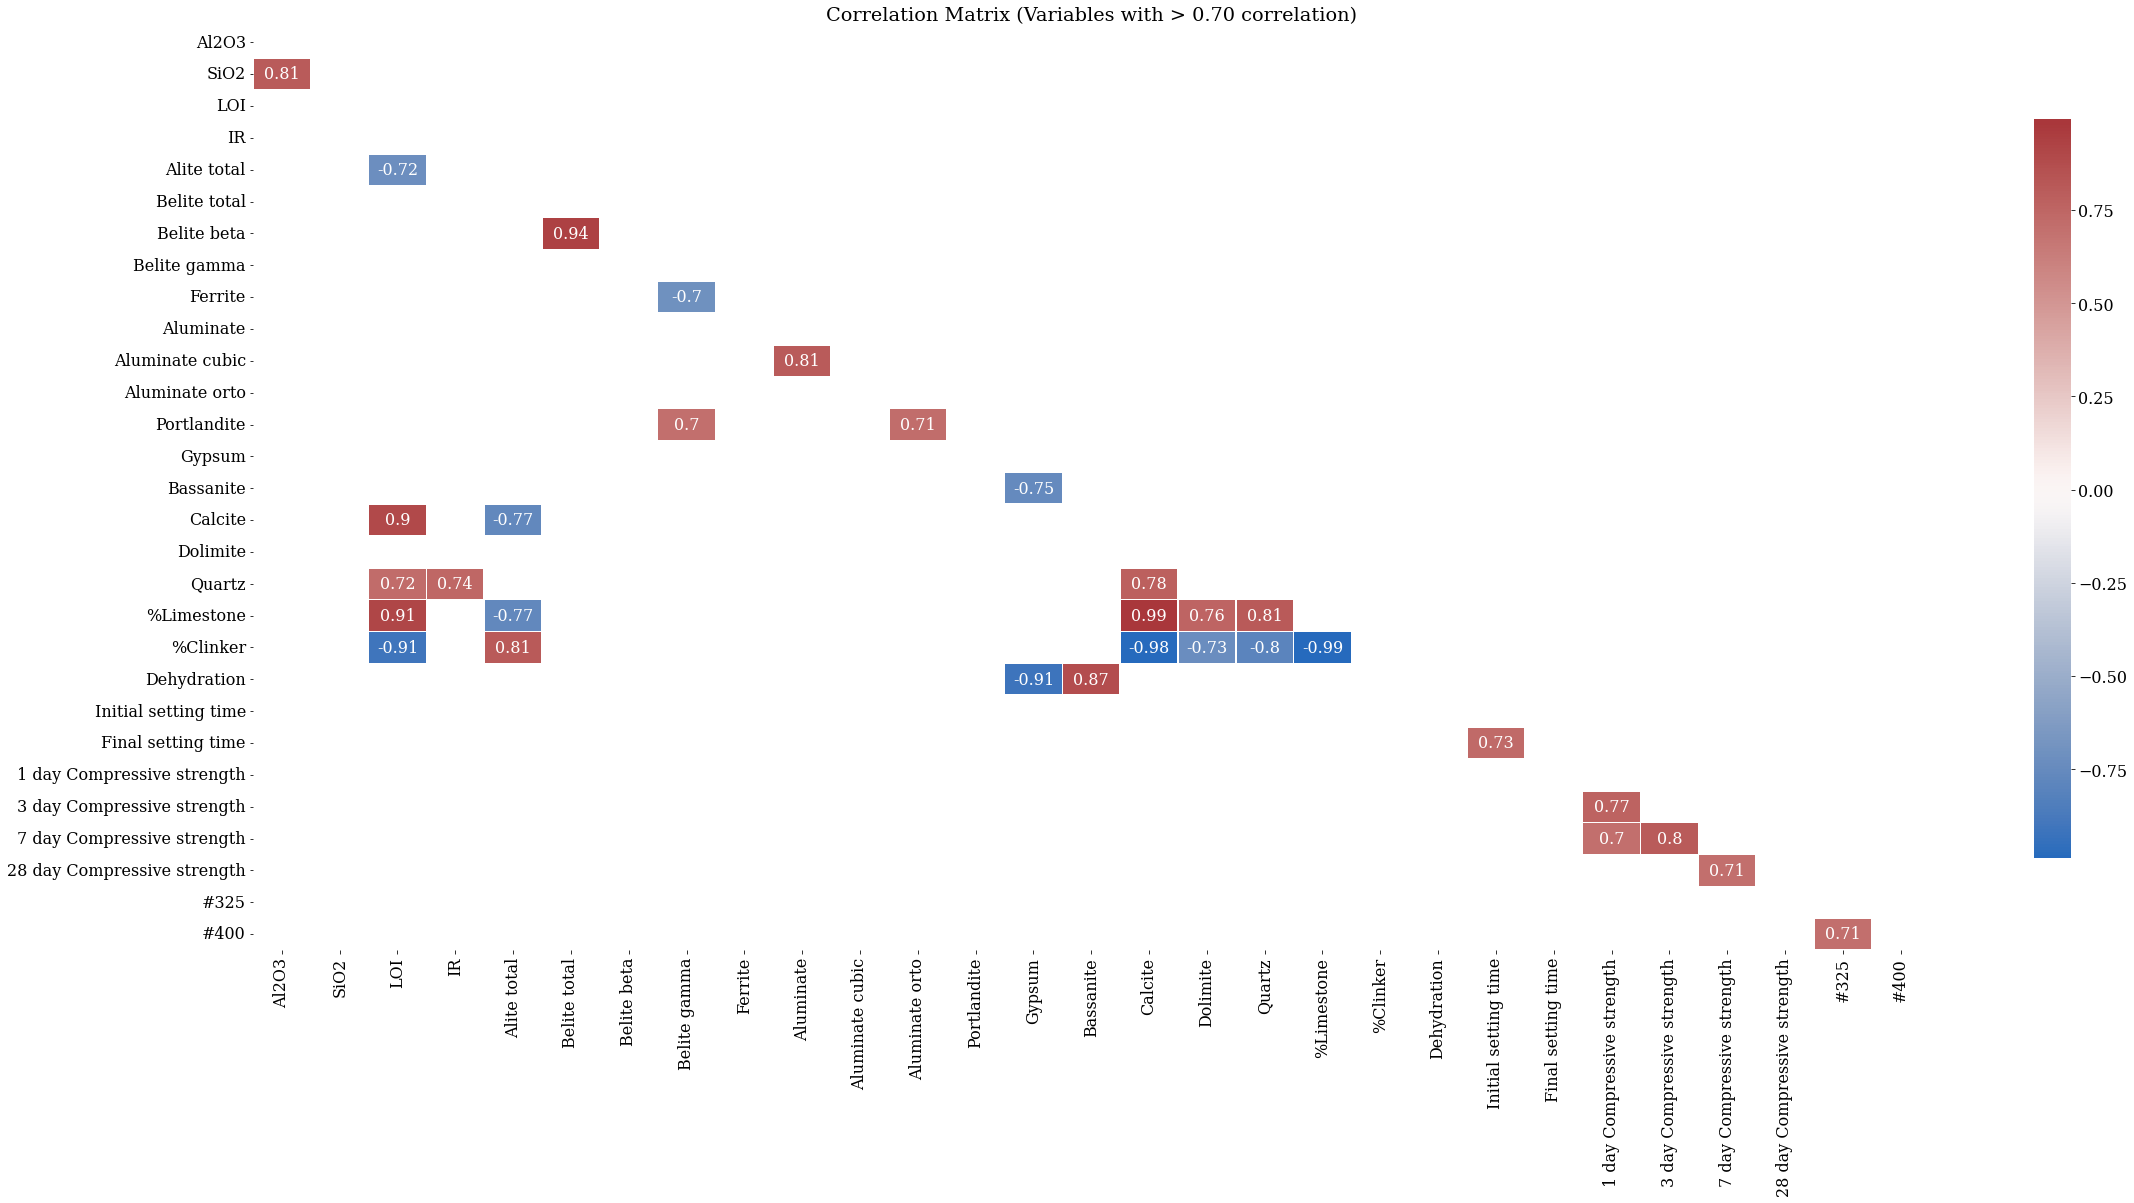

<IPython.core.display.Javascript object>

In [32]:
df_corr = df.corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [33]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite                     %Limestone                     0.994888
%Limestone                  %Clinker                       0.987030
Calcite                     %Clinker                       0.984111
Belite total                Belite beta                    0.936379
Gypsum                      Dehydration                    0.914355
LOI                         %Limestone                     0.911685
                            %Clinker                       0.906273
                            Calcite                        0.895410
Bassanite                   Dehydration                    0.874584
Alite total                 %Clinker                       0.814627
Quartz                      %Limestone                     0.811324
Al2O3                       SiO2                           0.807074
Aluminate                   Aluminate cubic                0.806506
3 day Compressive strength  7 day Compressive strength     0.801858
Quartz                      %Clinker            

<IPython.core.display.Javascript object>

In [34]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.705402
3 day Compressive strength   28 day Compressive strength    0.620833
1 day Compressive strength   28 day Compressive strength    0.541538
Fe2O3                        28 day Compressive strength    0.487348
%Limestone                   28 day Compressive strength    0.479914
MgO                          28 day Compressive strength    0.477936
Bassanite                    28 day Compressive strength    0.475435
Calcite                      28 day Compressive strength    0.471639
LOI                          28 day Compressive strength    0.469721
Aluminate orto               28 day Compressive strength    0.461741
%Clinker                     28 day Compressive strength    0.455281
Quartz                       28 day Compressive strength    0.431626
Dehydration                  28 day Compressive strength    0.423816
Aluminate                    28 day Compressive strength    0.414795
IR                           28 da

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

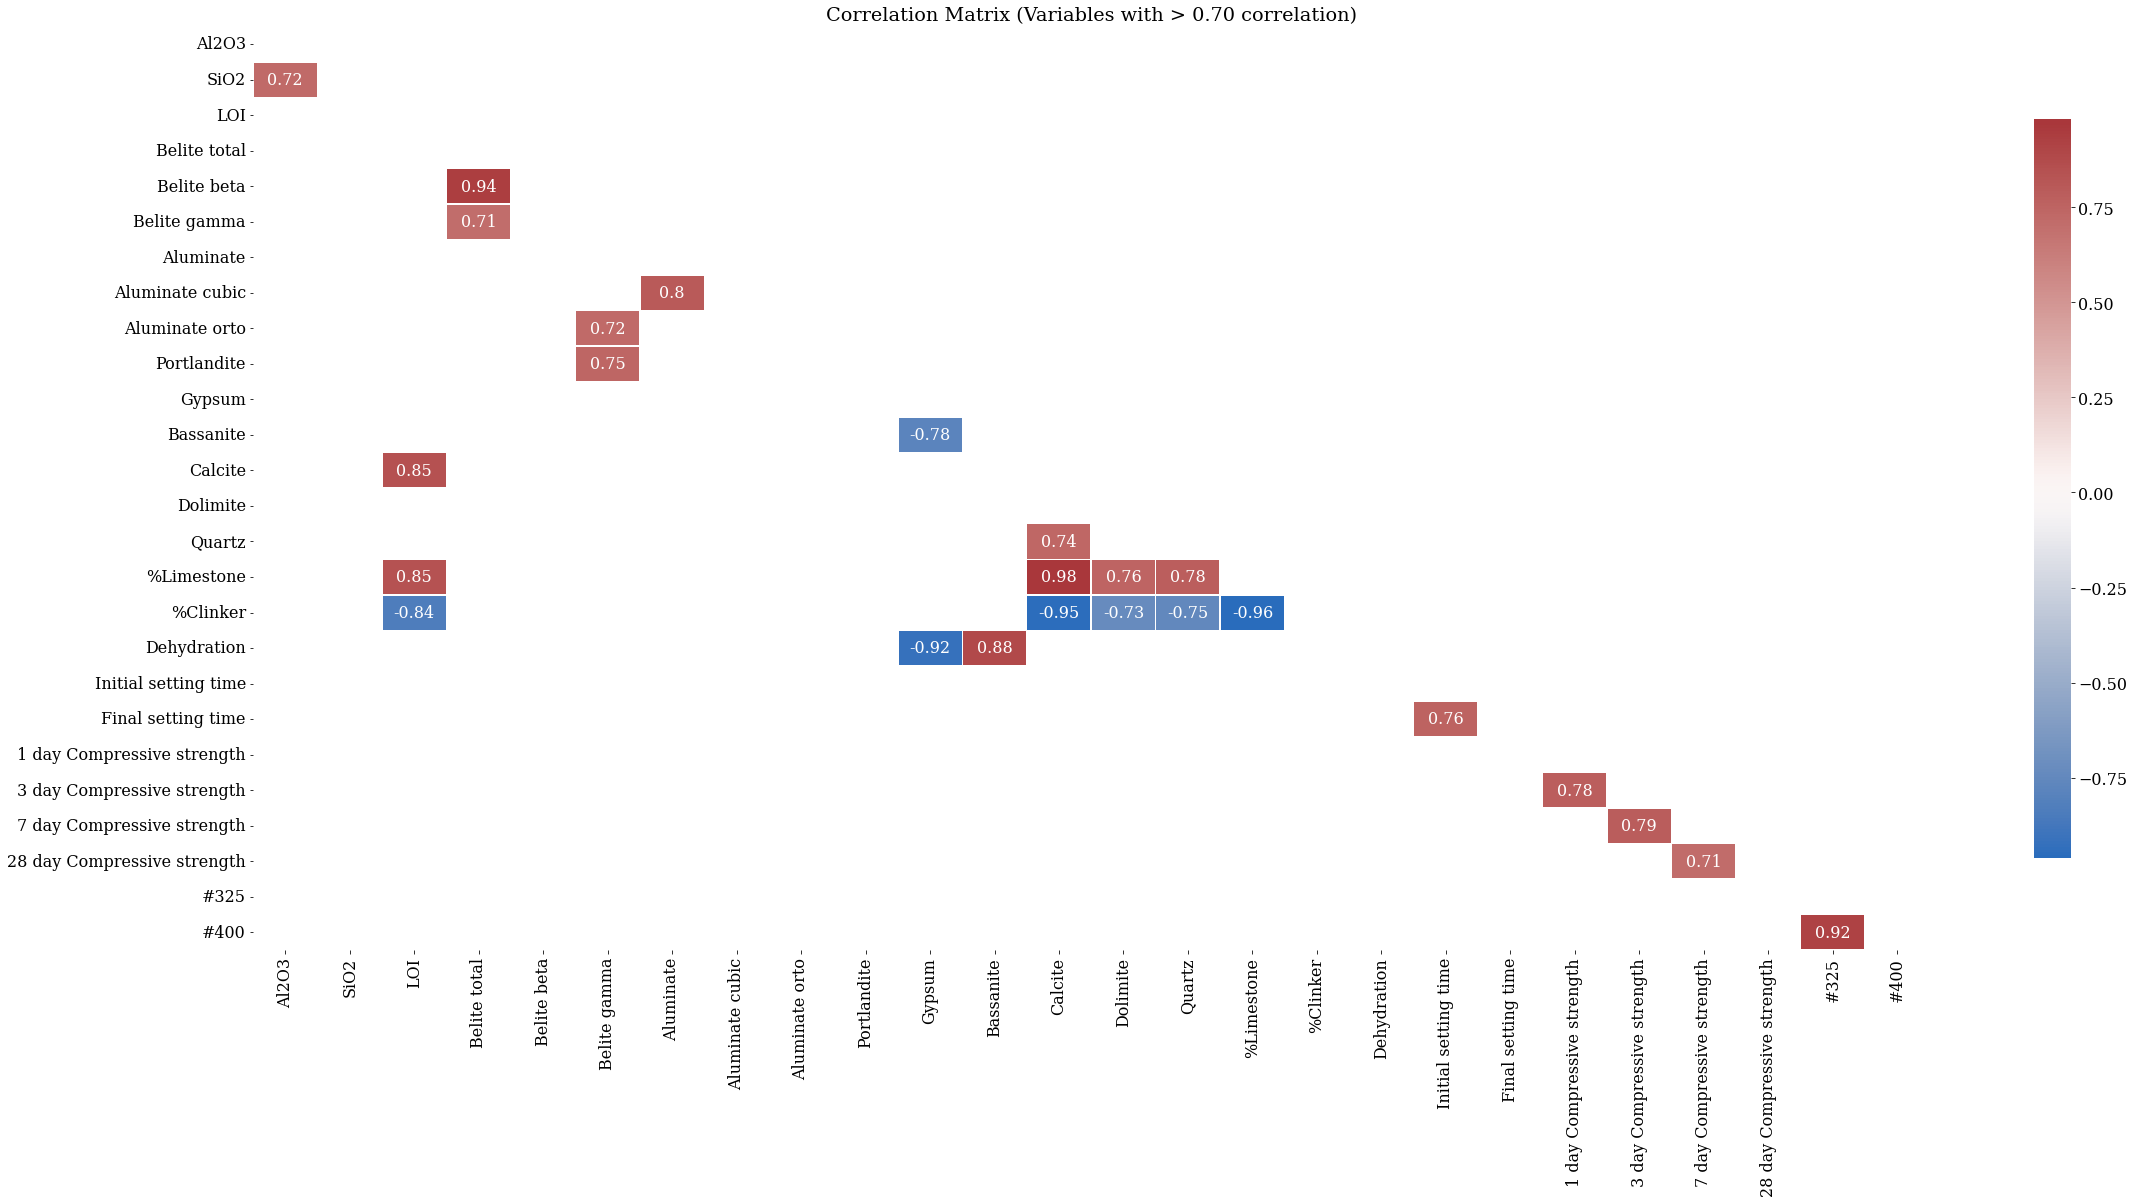

<IPython.core.display.Javascript object>

In [35]:
df_corr = df.corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [36]:
corr_matrix = df.corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite                     %Limestone                     0.983041
%Limestone                  %Clinker                       0.960640
Calcite                     %Clinker                       0.947331
Belite total                Belite beta                    0.940720
Gypsum                      Dehydration                    0.919236
#325                        #400                           0.918384
Bassanite                   Dehydration                    0.884584
LOI                         Calcite                        0.851789
                            %Limestone                     0.845293
                            %Clinker                       0.835393
Aluminate                   Aluminate cubic                0.804007
3 day Compressive strength  7 day Compressive strength     0.791805
Gypsum                      Bassanite                      0.781297
Quartz                      %Limestone                     0.781070
1 day Compressive strength  3 day Compressive st

<IPython.core.display.Javascript object>

In [37]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.713966
3 day Compressive strength   28 day Compressive strength    0.605646
Fe2O3                        28 day Compressive strength    0.537837
1 day Compressive strength   28 day Compressive strength    0.534694
Calcite                      28 day Compressive strength    0.525229
%Limestone                   28 day Compressive strength    0.525078
LOI                          28 day Compressive strength    0.516814
%Clinker                     28 day Compressive strength    0.500286
Bassanite                    28 day Compressive strength    0.490343
MgO                          28 day Compressive strength    0.484514
Aluminate orto               28 day Compressive strength    0.466358
Quartz                       28 day Compressive strength    0.458708
Dolimite                     28 day Compressive strength    0.404931
IR                           28 day Compressive strength    0.403224
Belite gamma                 28 da

<IPython.core.display.Javascript object>

<h4>3.3.3 Kendall</h4>

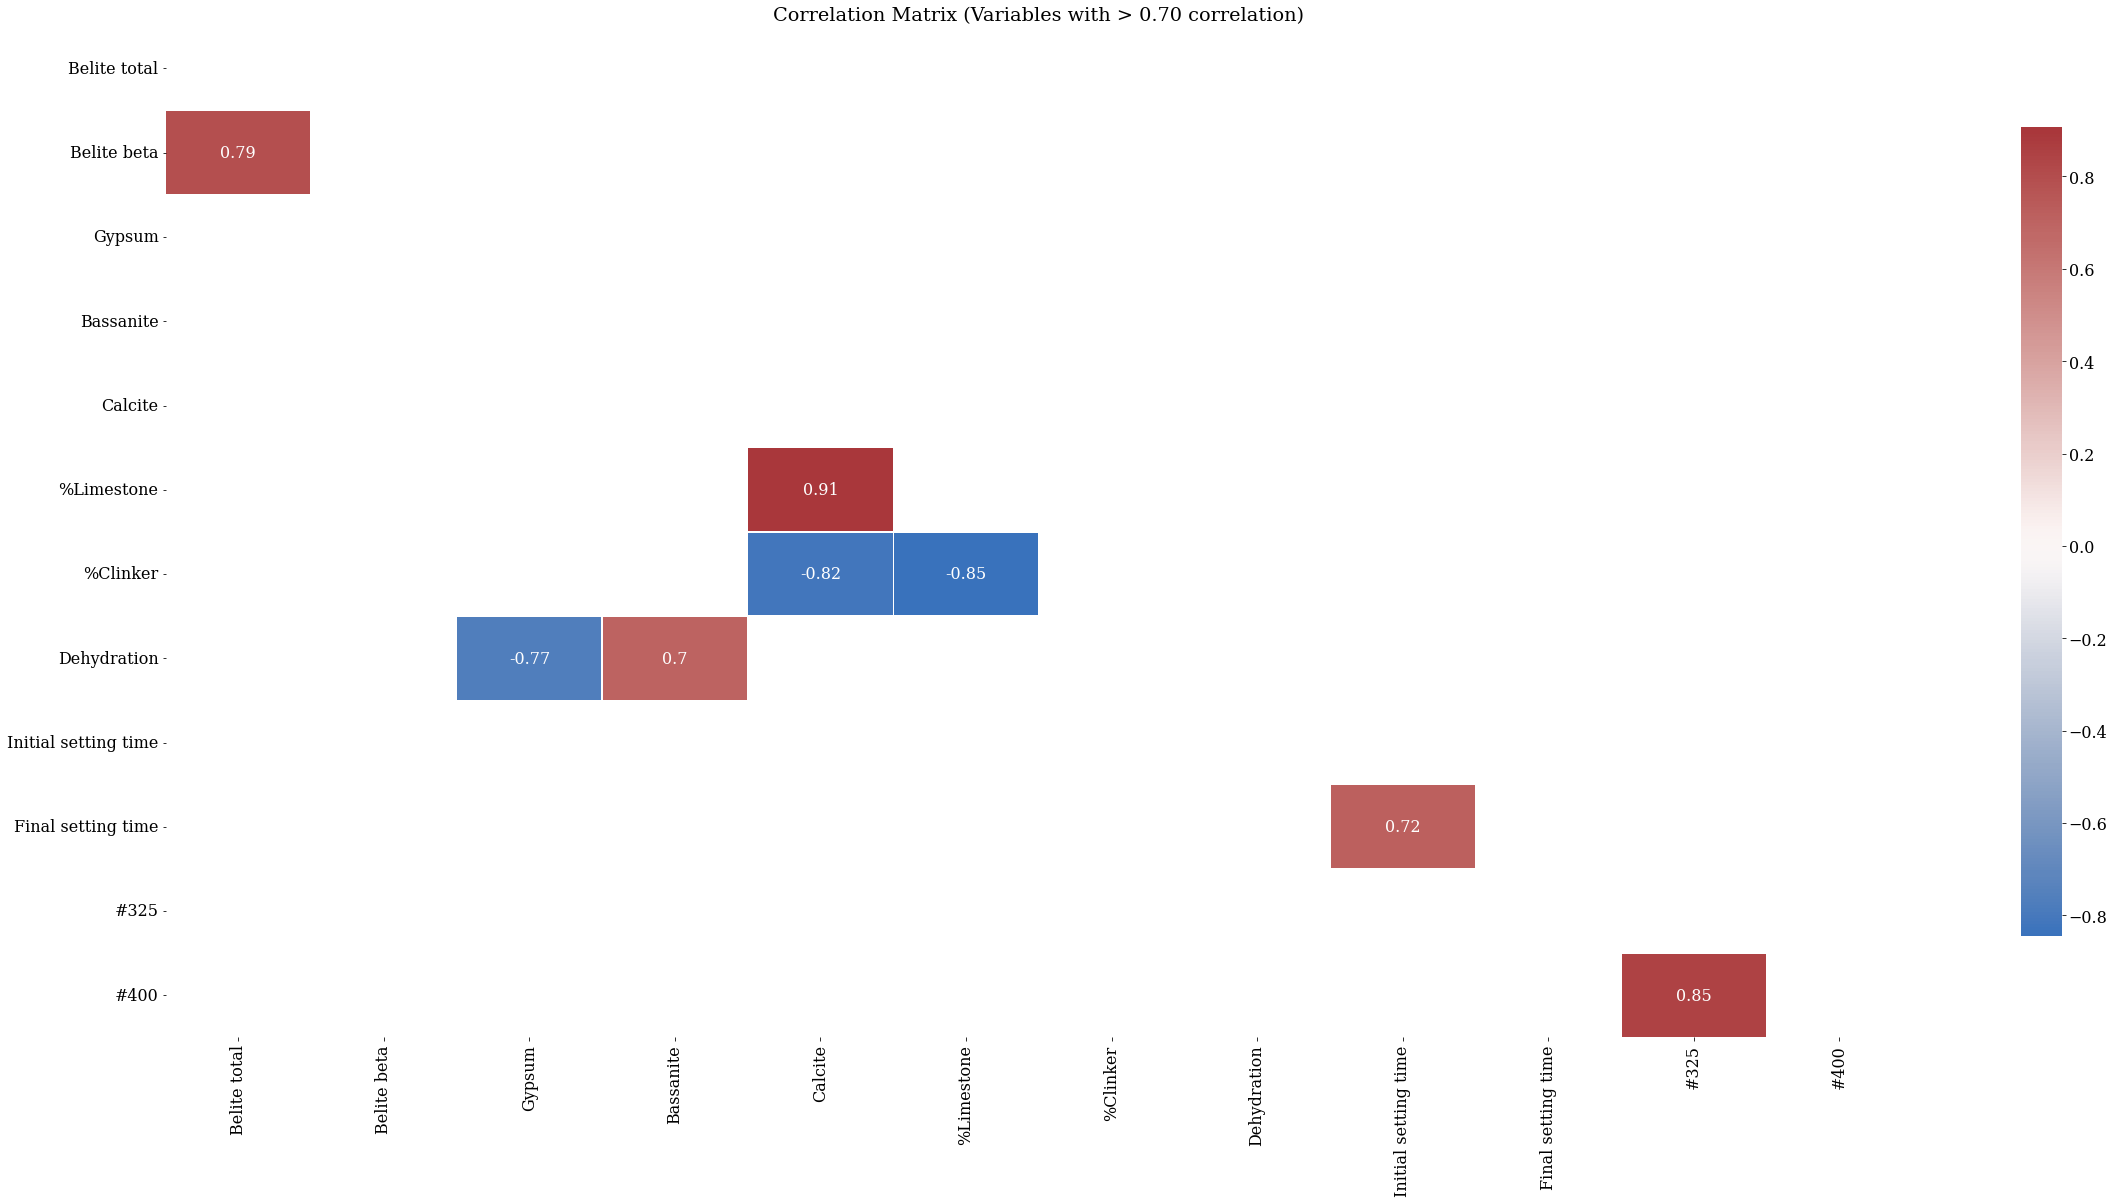

<IPython.core.display.Javascript object>

In [38]:
df_corr = df.corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [39]:
corr_matrix = df.corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite               %Limestone            0.906176
#325                  #400                  0.846192
%Limestone            %Clinker              0.845401
Calcite               %Clinker              0.816574
Belite total          Belite beta           0.791929
Gypsum                Dehydration           0.767224
Initial setting time  Final setting time    0.717577
Bassanite             Dehydration           0.702098
dtype: float64

<IPython.core.display.Javascript object>

In [40]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.535491
3 day Compressive strength   28 day Compressive strength    0.439355
%Limestone                   28 day Compressive strength    0.381640
Calcite                      28 day Compressive strength    0.381411
LOI                          28 day Compressive strength    0.376363
1 day Compressive strength   28 day Compressive strength    0.374080
Fe2O3                        28 day Compressive strength    0.364307
%Clinker                     28 day Compressive strength    0.357475
Bassanite                    28 day Compressive strength    0.357016
Aluminate orto               28 day Compressive strength    0.330279
Quartz                       28 day Compressive strength    0.327632
MgO                          28 day Compressive strength    0.326497
Belite gamma                 28 day Compressive strength    0.305292
IR                           28 day Compressive strength    0.283080
Dolimite                     28 da

<IPython.core.display.Javascript object>

#### Bivariate Analysis

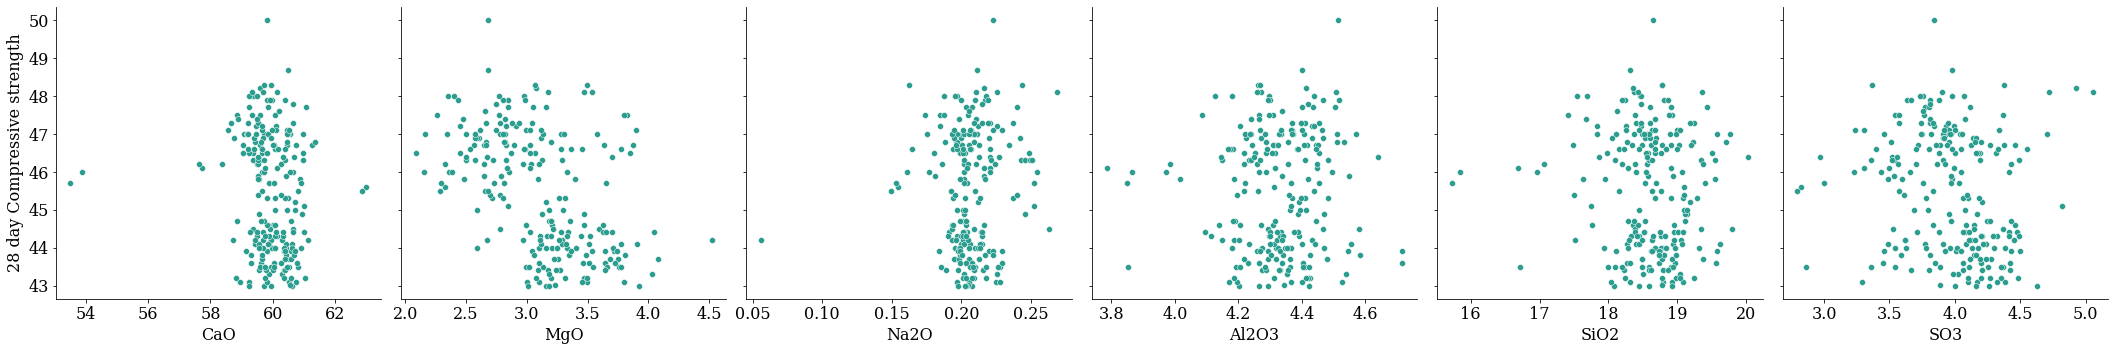

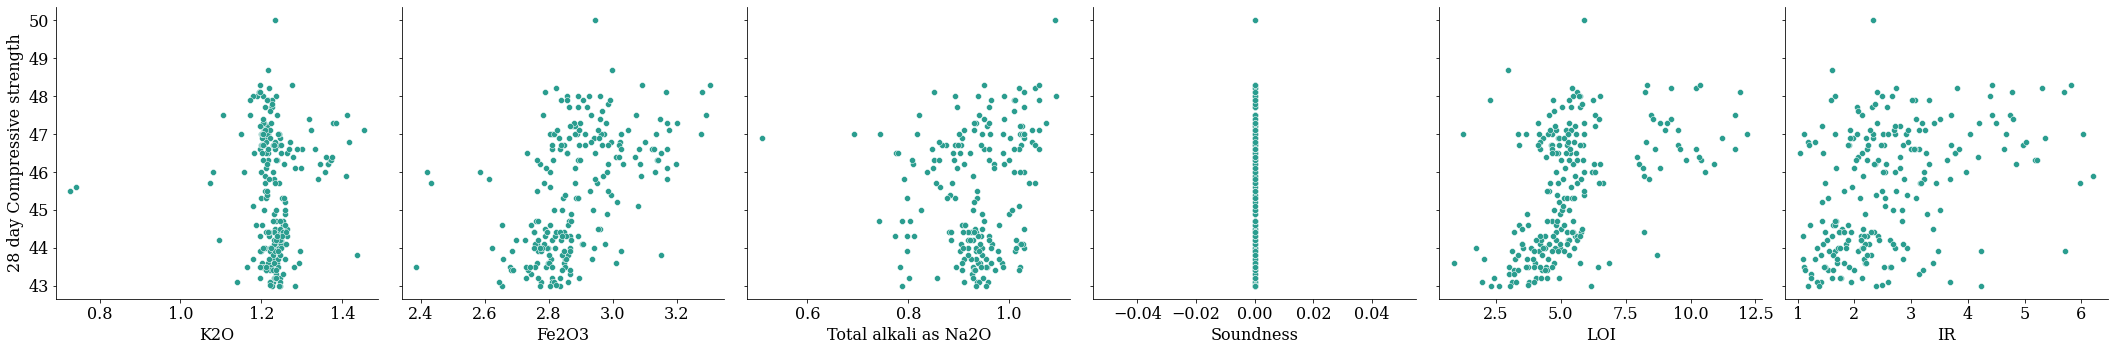

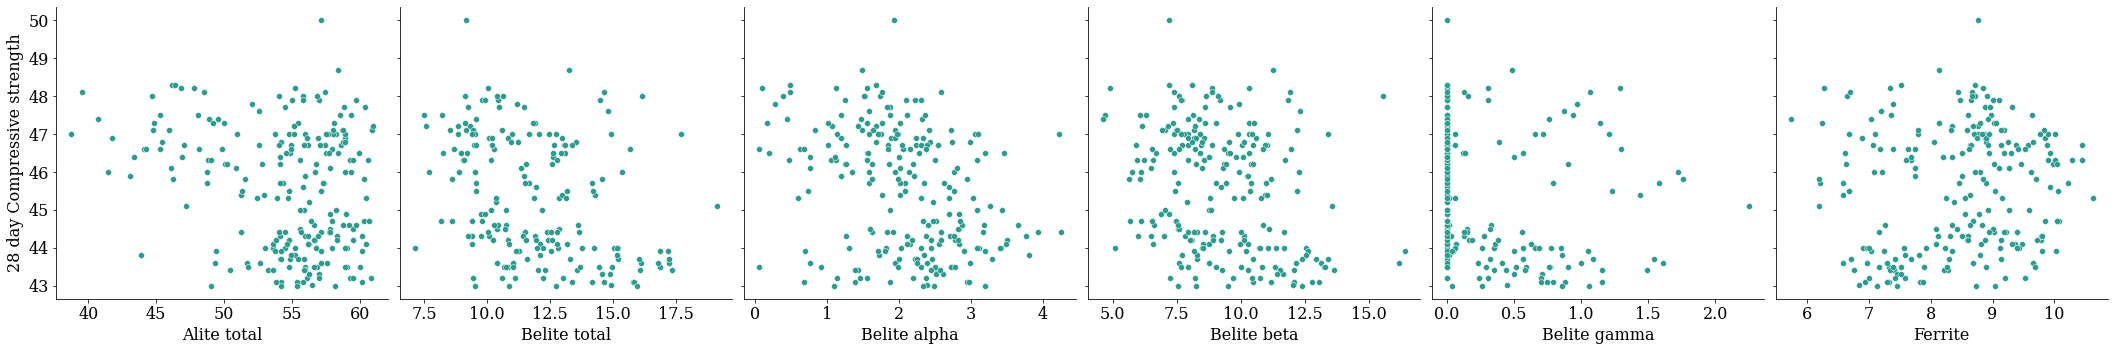

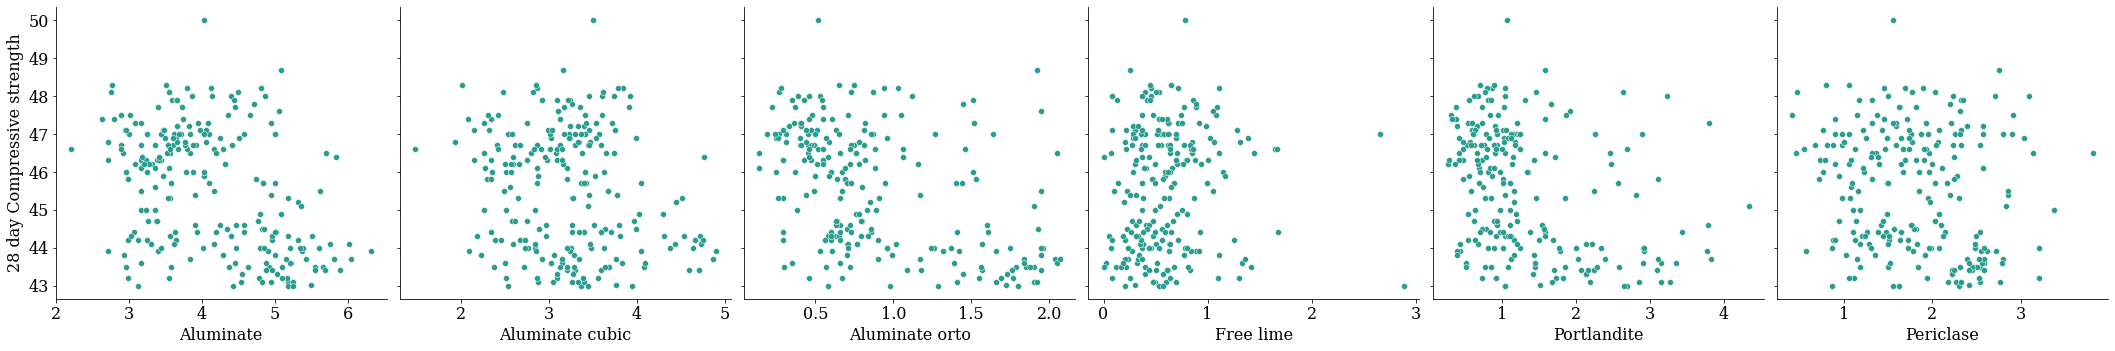

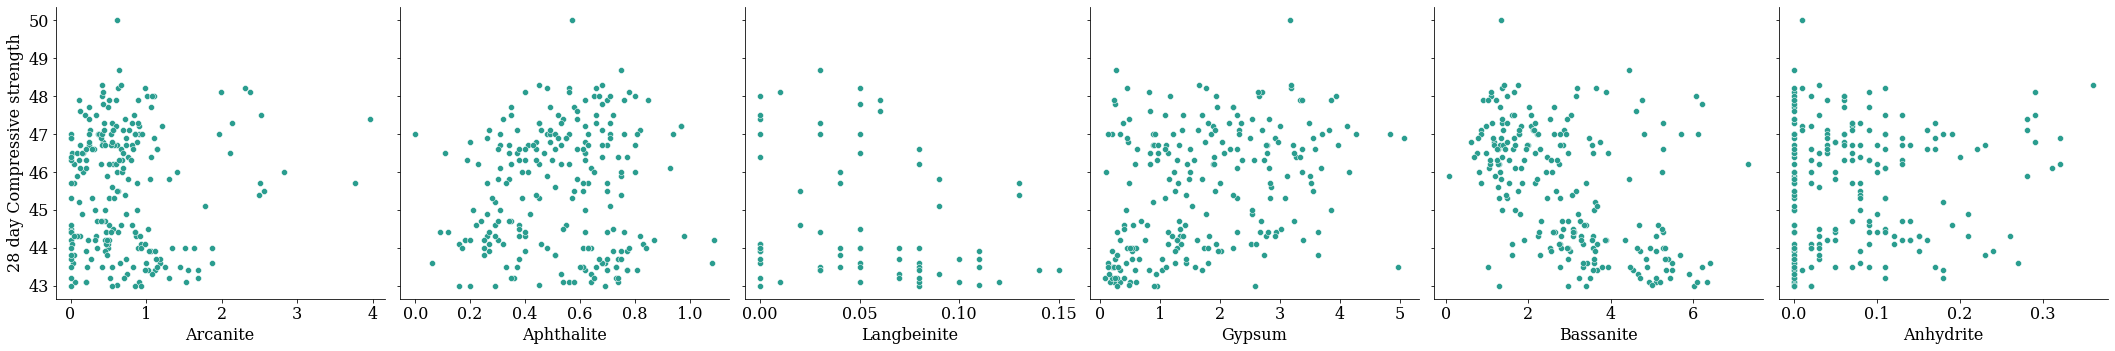

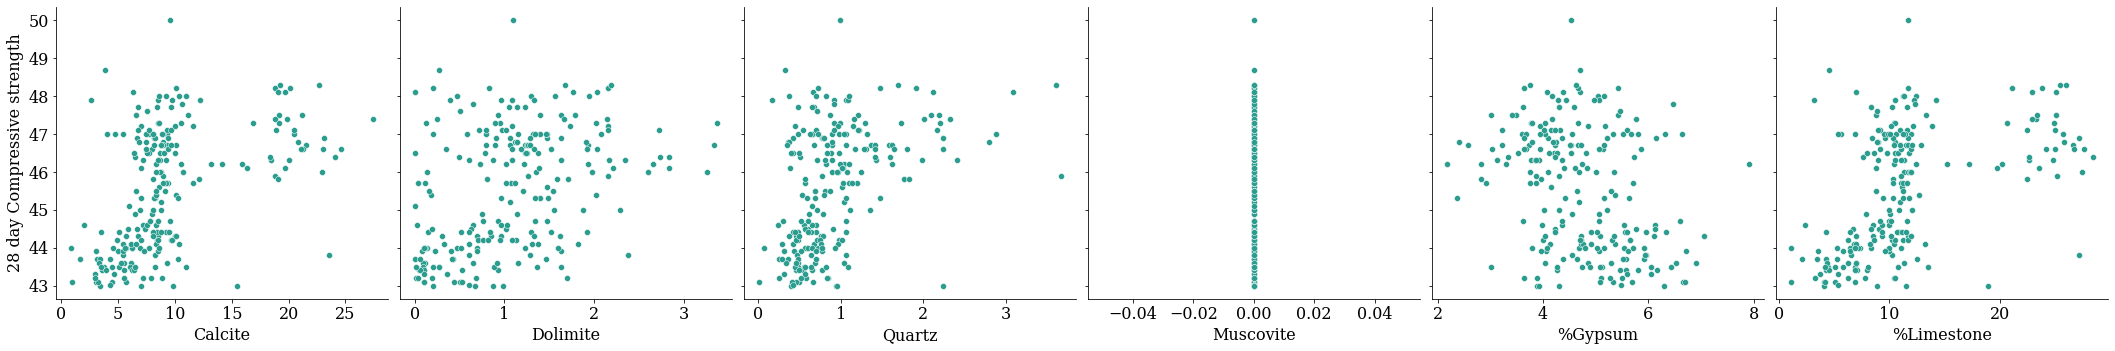

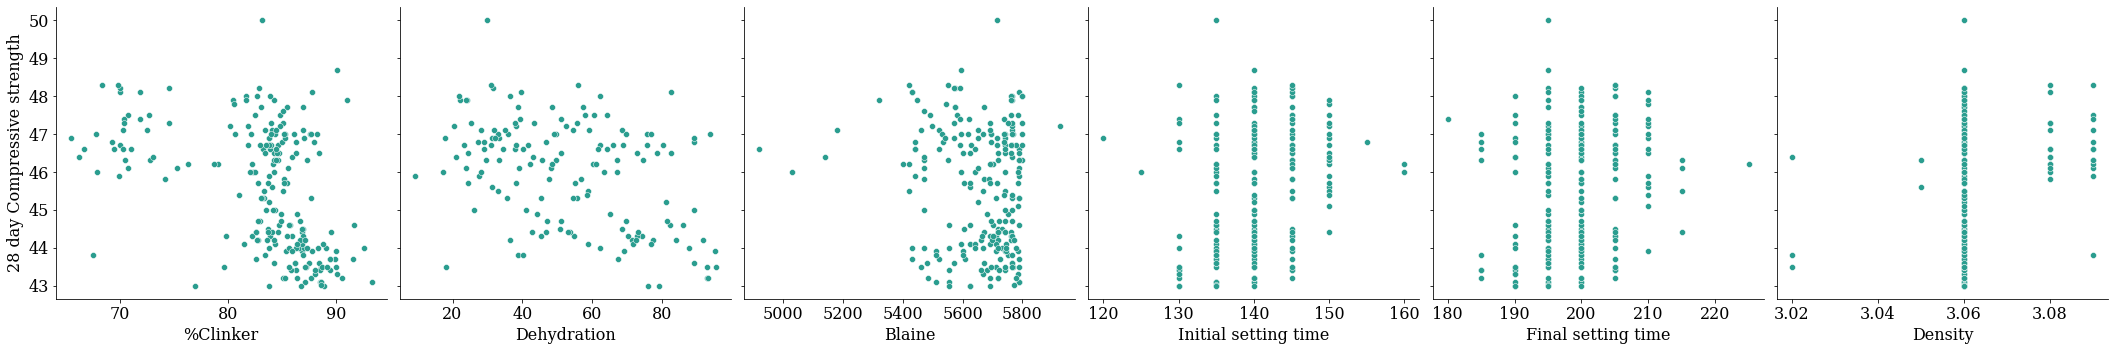

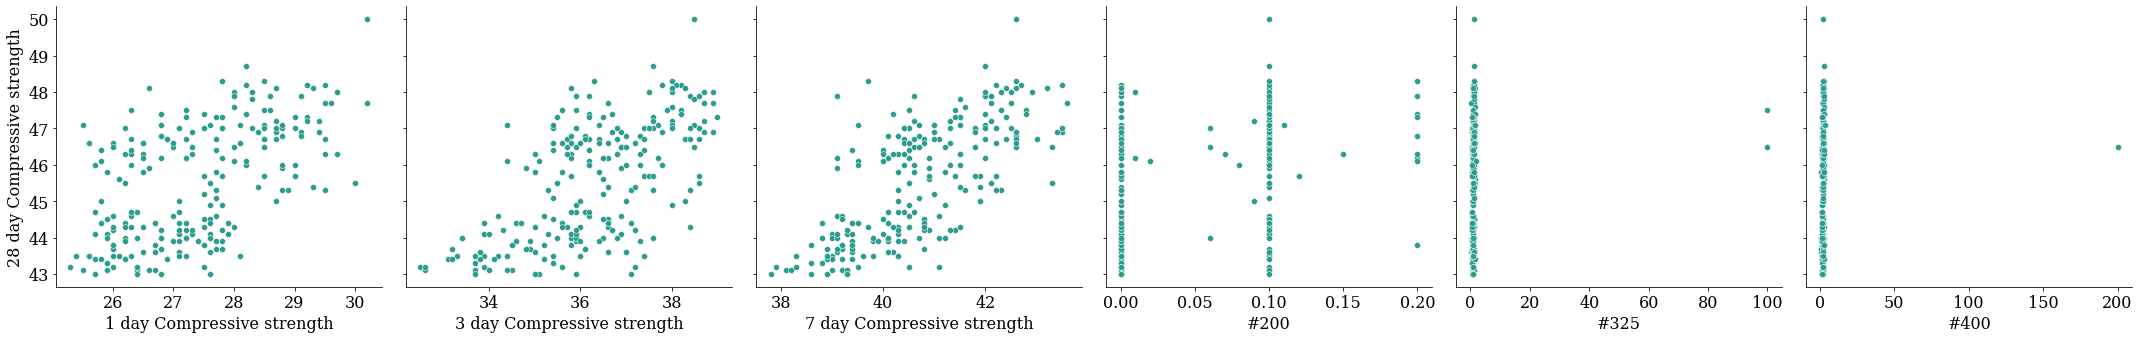

<IPython.core.display.Javascript object>

In [41]:
num_lines = 8
plots_per_line = 6

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("28 day Compressive strength")
variables_to_plot.remove("Date")

num_lines = 8
plots_per_line = 6

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["28 day Compressive strength"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

plt.tight_layout()
plt.show()

In [42]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

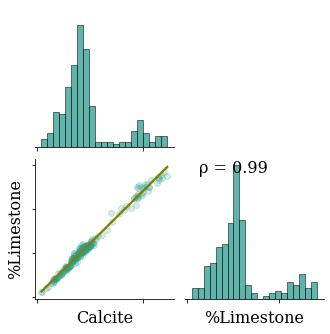

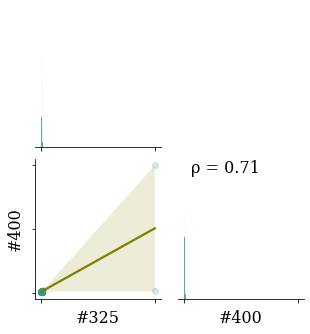

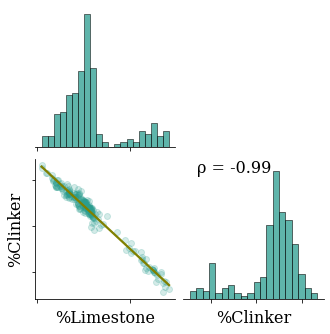

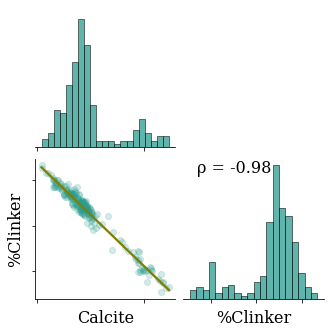

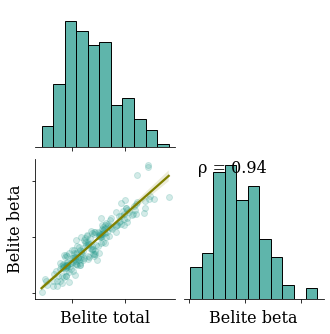

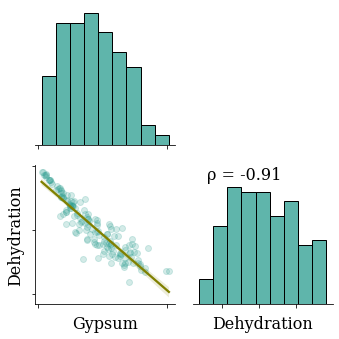

<IPython.core.display.Javascript object>

In [43]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [44]:
dates = df["Date"]
dates

0     2020-01-03
1     2020-01-07
2     2020-01-10
3     2020-01-15
4     2020-01-18
         ...    
229   2021-12-21
230   2022-01-03
231   2022-02-11
232   2022-02-21
233   2022-03-16
Name: Date, Length: 234, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [45]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

194 valid days out of 220


<IPython.core.display.Javascript object>

In [46]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022}


<IPython.core.display.Javascript object>

In [47]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5}}

<IPython.core.display.Javascript object>

In [48]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        12
      2        11
      3        11
      4         8
      5         9
      6         9
      7        10
      8         7
      9         8
      10        7
      11        7
      12        6
2021  1         7
      2         6
      3         6
      4         7
      5         7
      6         7
      7         8
      8         8
      9         6
      10       10
      11        7
      12        6
2022  1         7
      2         8
      3         8
      4         6
      5         1
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

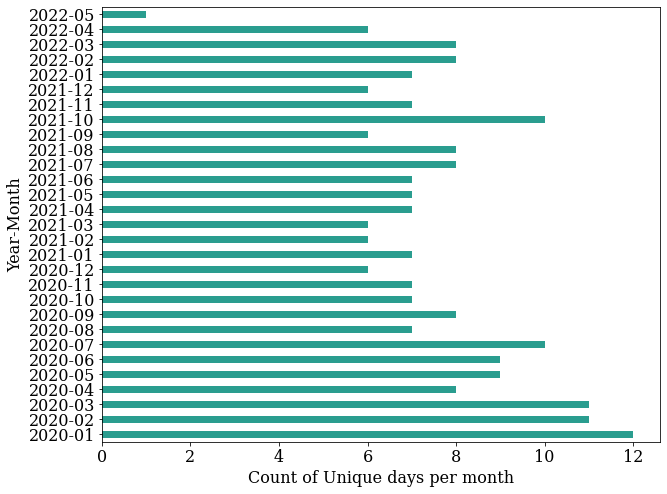

<IPython.core.display.Javascript object>

In [49]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [50]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        14
      2        12
      3        12
      4         9
      5         9
      6        10
      7        11
      8         8
      9         8
      10        7
      11        7
      12        6
2021  1         7
      2         6
      3         6
      4         8
      5         7
      6         7
      7         8
      8        10
      9         8
      10       10
      11        7
      12        7
2022  1         7
      2         8
      3         8
      4         6
      5         1
Name: size, dtype: int64


<IPython.core.display.Javascript object>

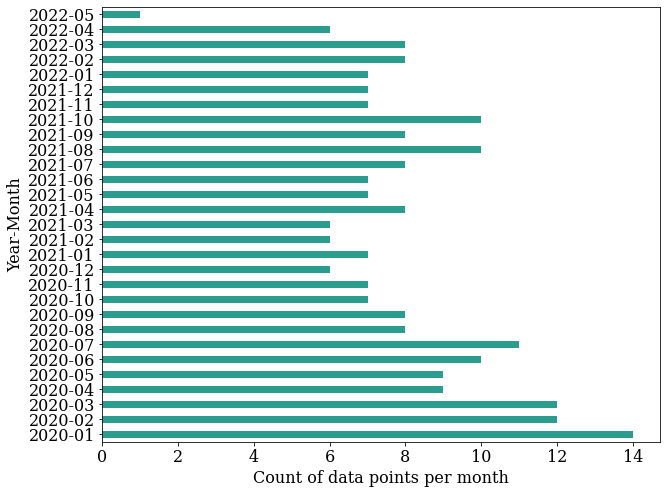

<IPython.core.display.Javascript object>

In [51]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [52]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2022-5 has the minimum number of days with samples - 1
2020-1 has the maximum number of days with samples - 14


<IPython.core.display.Javascript object>

In [53]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 9, 2021: 7, 2022: 6}

Mean number of observations - all years
8


<IPython.core.display.Javascript object>

In [54]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

,DayCount
count,220.000000
mean,1.063636
std,0.244661
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


<IPython.core.display.Javascript object>

In [55]:
day_counts[["DayCount"]].value_counts()

DayCount
1           206
2            14
dtype: int64

<IPython.core.display.Javascript object>

In [56]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

,Year,Month,Day,DayCount
3,2020,1,10,2
4,2020,1,15,2
12,2020,2,3,2
25,2020,3,6,2
35,2020,4,7,2
59,2020,6,30,2
69,2020,7,31,2
72,2020,8,12,2
128,2021,4,22,2
153,2021,8,2,2


<IPython.core.display.Javascript object>

In [57]:
df_copy = df.copy()
df_copy["Year"] = df_copy["Date"].dt.year
df_copy["Month"] = df_copy["Date"].dt.month
df_copy["Day"] = df_copy["Date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = (
        df_merge[df_merge["DayCount"] == daycount]["28 day Compressive strength"]
        .isna()
        .sum()
    )
    print(daycount, nulls)

1 3
2 1


<IPython.core.display.Javascript object>

In [58]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])

# Average Frequency
np.mean(diffs)

Timedelta('3 days 10:42:44.806866952')

<IPython.core.display.Javascript object>

In [59]:
# Average Frequency
np.mean(diffs)

Timedelta('3 days 10:42:44.806866952')

<IPython.core.display.Javascript object>

In [60]:
Counter(diffs)

Counter({Timedelta('4 days 00:00:00'): 51,
         Timedelta('3 days 00:00:00'): 37,
         Timedelta('5 days 00:00:00'): 55,
         Timedelta('6 days 00:00:00'): 23,
         Timedelta('7 days 00:00:00'): 18,
         Timedelta('2 days 00:00:00'): 4,
         Timedelta('8 days 00:00:00'): 4,
         Timedelta('9 days 00:00:00'): 7,
         Timedelta('10 days 00:00:00'): 8,
         Timedelta('14 days 00:00:00'): 2,
         Timedelta('22 days 00:00:00'): 2,
         Timedelta('11 days 00:00:00'): 1,
         Timedelta('-848 days +00:00:00'): 1,
         Timedelta('15 days 00:00:00'): 2,
         Timedelta('13 days 00:00:00'): 6,
         Timedelta('506 days 00:00:00'): 1,
         Timedelta('-551 days +00:00:00'): 1,
         Timedelta('73 days 00:00:00'): 1,
         Timedelta('17 days 00:00:00'): 1,
         Timedelta('26 days 00:00:00'): 1,
         Timedelta('12 days 00:00:00'): 2,
         Timedelta('206 days 00:00:00'): 1,
         Timedelta('18 days 00:00:00'): 1,
      

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='count'>

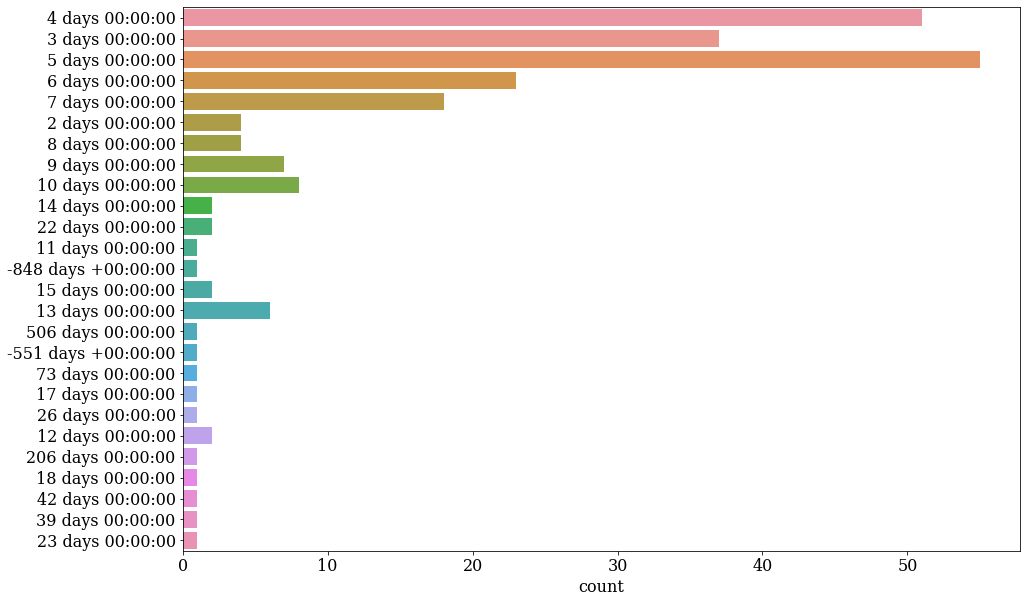

<IPython.core.display.Javascript object>

In [61]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [62]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[21.79,
 15.81,
 23.5,
 9.83,
 7.69,
 1.71,
 1.71,
 2.99,
 3.42,
 0.85,
 0.85,
 0.43,
 0.43,
 0.85,
 2.56,
 0.43,
 0.43,
 0.43,
 0.43,
 0.43,
 0.85,
 0.43,
 0.43,
 0.43,
 0.43,
 0.43]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Days

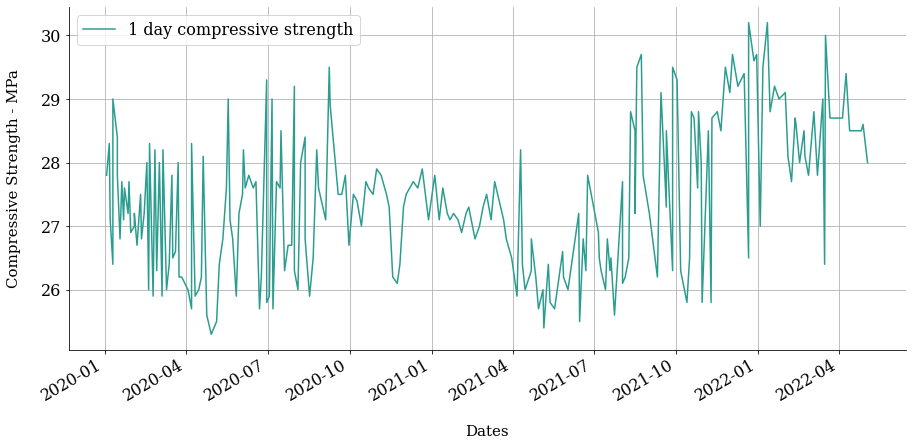

<IPython.core.display.Javascript object>

In [63]:
tmp = df[["Date", "1 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 3 Days

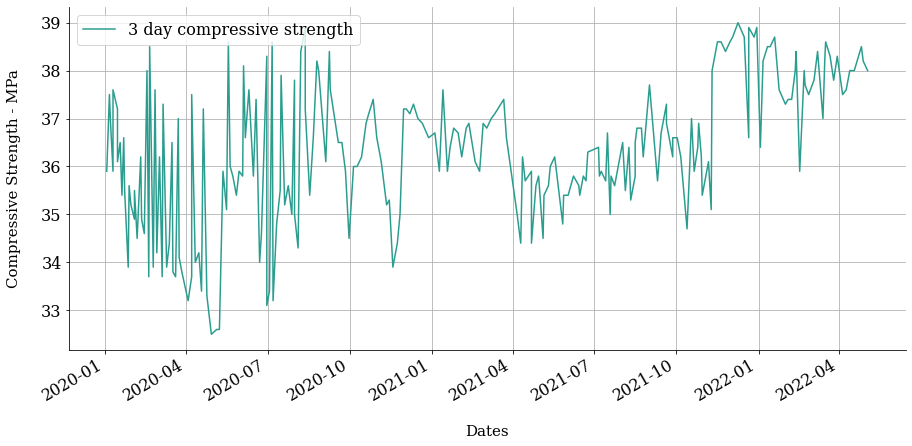

<IPython.core.display.Javascript object>

In [64]:
tmp = df[["Date", "3 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 7 Days

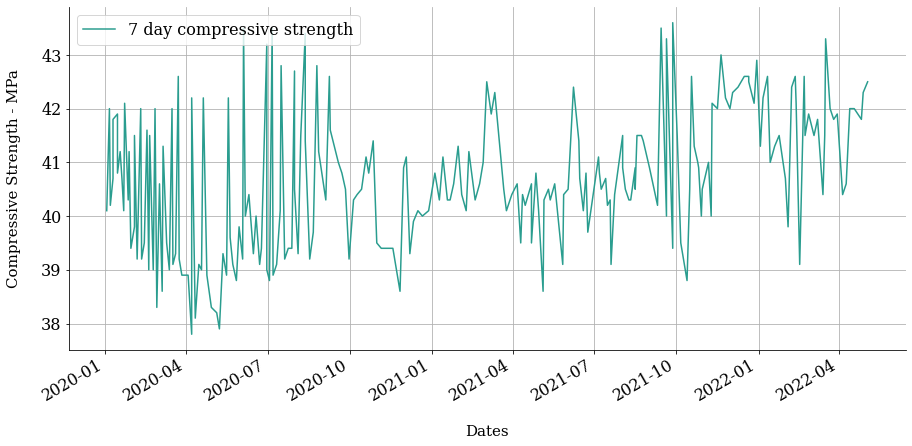

<IPython.core.display.Javascript object>

In [65]:
tmp = df[["Date", "7 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 28 Days

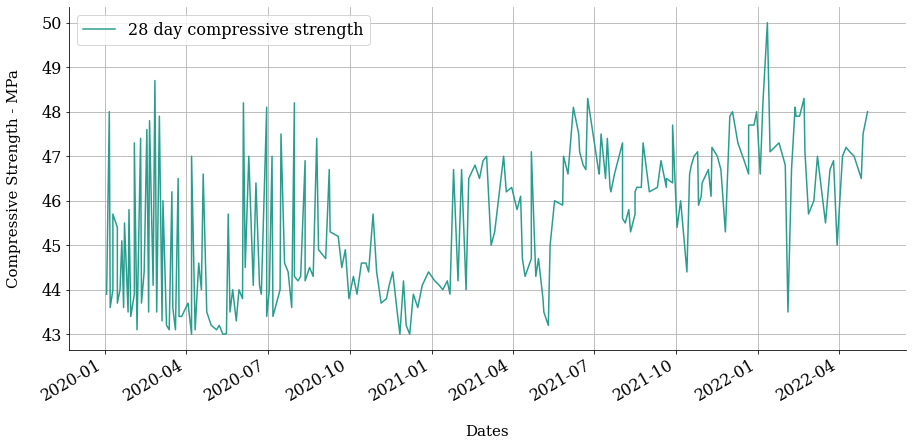

<IPython.core.display.Javascript object>

In [66]:
tmp = df[["Date", "28 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()